## Introduction

### Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve their services so that customers do not renounce their credit cards

### Objectives

1. Explore and visualize the dataset.
2. Build a classification model to predict if the customer is going to churn or not
3. Optimize the model using appropriate techniques
4. Generate a set of insights and recommendations that will help the bank

### Data Dictionary

1. CLIENTNUM: Client number. Unique identifier for the customer holding the account
2. Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
3. Customer_Age: Age in Years
4. Gender: Gender of the account holder
5. Dependent_count: Number of dependents
6. Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
7. Marital_Status: Marital Status of the account holder
8. Income_Category: Annual Income Category of the account holder
9. Card_Category: Type of Card
10. Months_on_book: Period of relationship with the bank
11. Total_Relationship_Count: Total no. of products held by the customer
12. Months_Inactive_12_mon: No. of months inactive in the last 12 months
13. Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
14. Credit_Limit: Credit Limit on the Credit Card
15. Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
16. Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
17. Total_Trans_Amt: Total Transaction Amount (Last 12 months)
18. Total_Trans_Ct: Total Transaction Count (Last 12 months)
19. Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
21. Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
22. Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

## Problem Statement

The problem statement is to find a classification model to identify the profile of Thera Bank customers who are likely to leave their credit card services, so that Thera Bank can identify aspects that they can improve. Customers that churn from the credit card services impact the bank greatly as it causes the bank to suffer losses. Hence, upon model building we will optimize on recall to prevent false negatives, which is costly to the bank.

## Data & Library Importing and Checking

In [1]:
#importing of required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

#import library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('BankChurners.csv')

In [3]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [4]:
df.shape

(10127, 21)

In [5]:
df.info()

#no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
#dropping CLIENTNUM as it does not provide any value for analysis

df.drop('CLIENTNUM',axis = 1,inplace=True)

In [7]:
df.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [8]:
df.describe(include ='object')

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

In [9]:
#checking unique categorical values and their counts

i = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
for j in i:
    print(df[j].value_counts())
    print('-'* 40)
    
#it is later revealed that there are no errors in naming

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------------


In [10]:
#converting object data type to category

for j in i:
    df[j]=df[j].astype('category')

In [11]:
#checking the data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

There are no missing values or erroneous naming on the data. Let's do an exploratory data analysis to check if there are outliers. 

## Exploratory Data Analysis

### Univariate Analysis

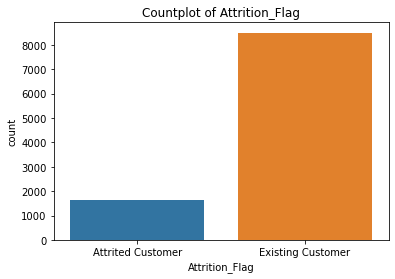

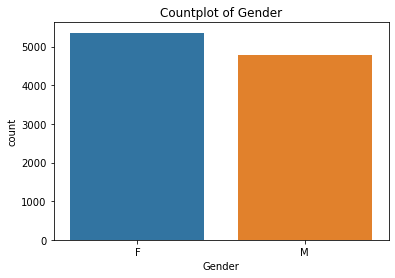

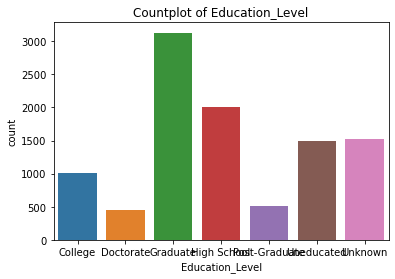

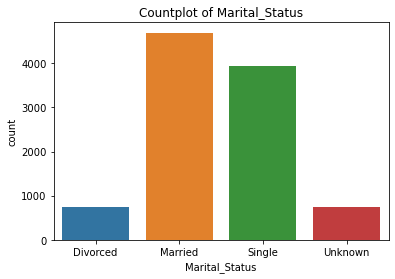

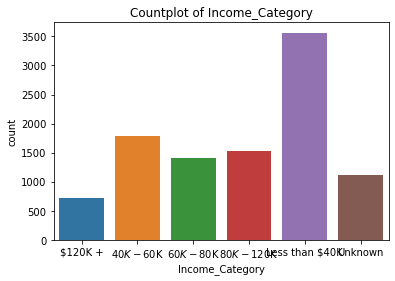

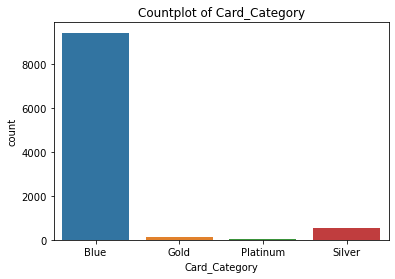

In [12]:
for a in i:
    sns.countplot(df[a])
    plt.title('Countplot of {}'.format(a))
    plt.show()

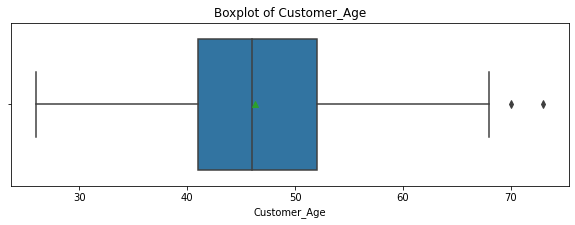

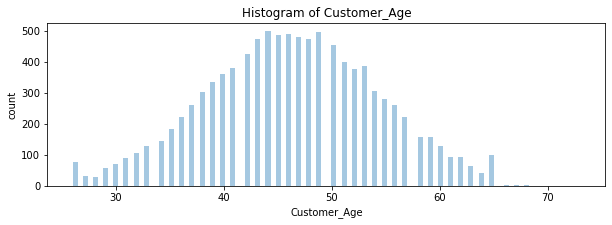

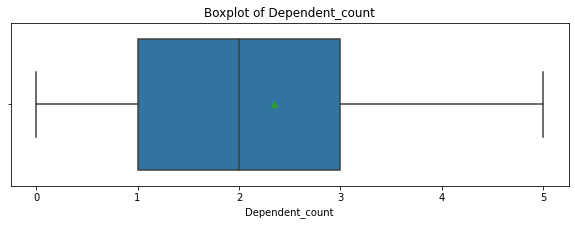

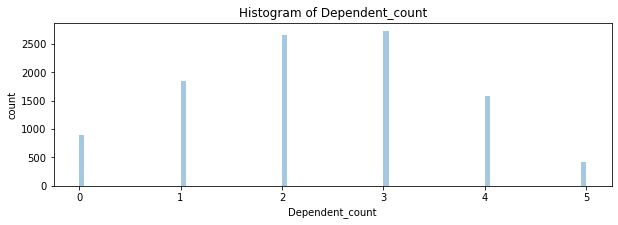

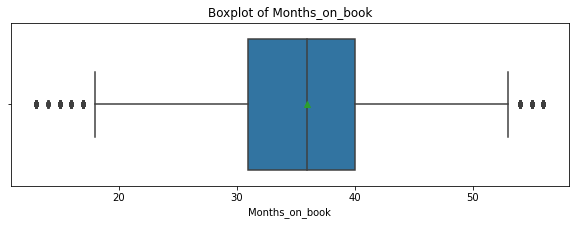

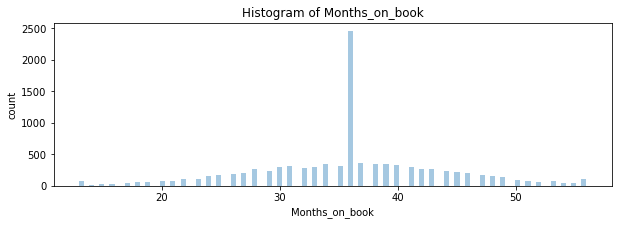

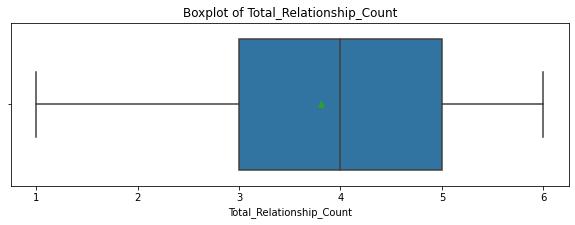

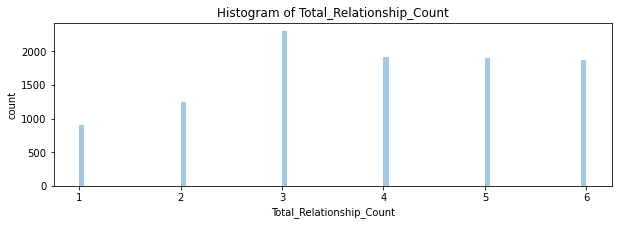

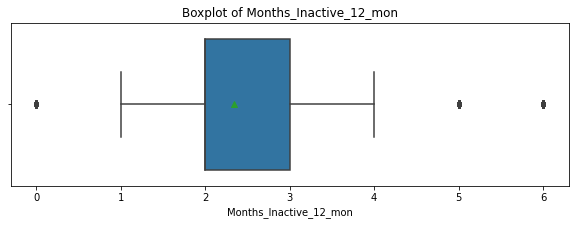

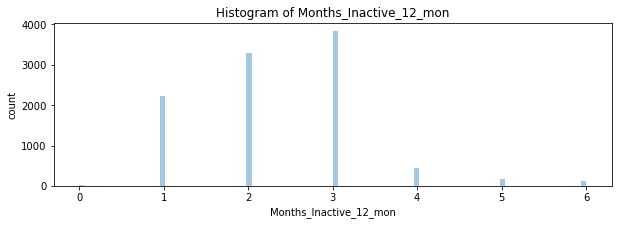

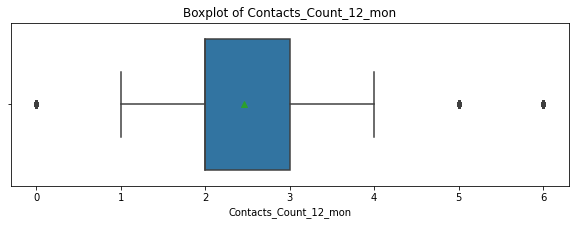

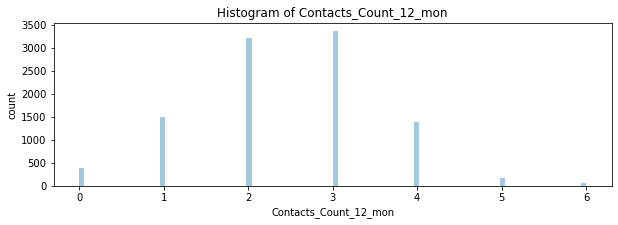

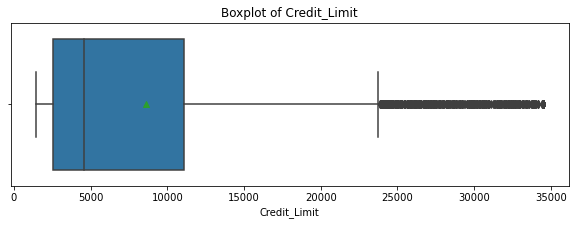

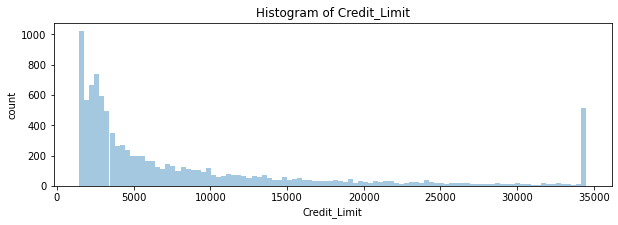

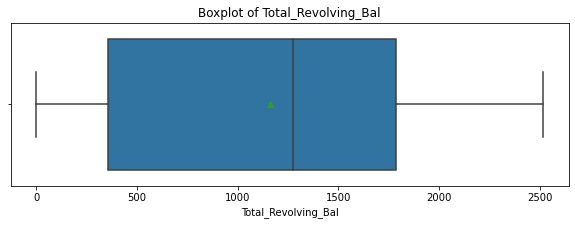

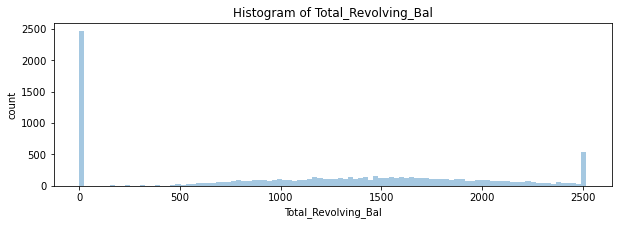

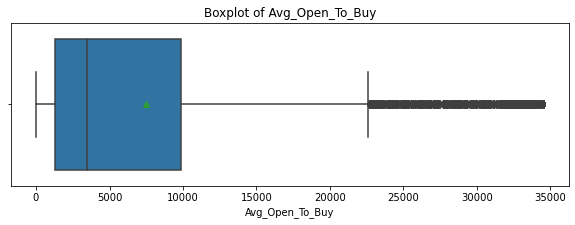

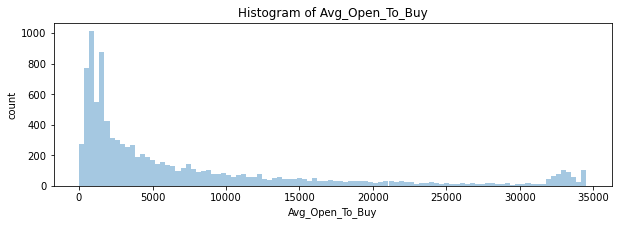

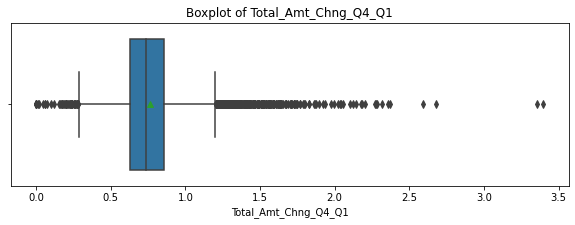

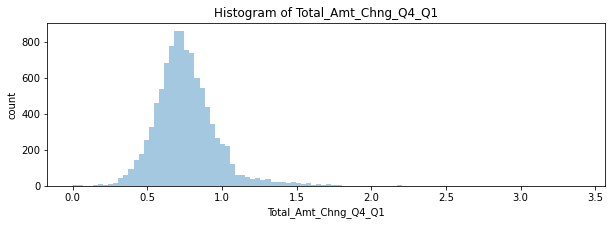

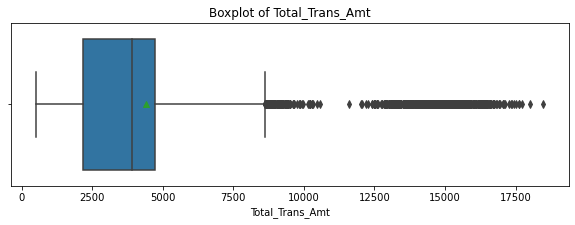

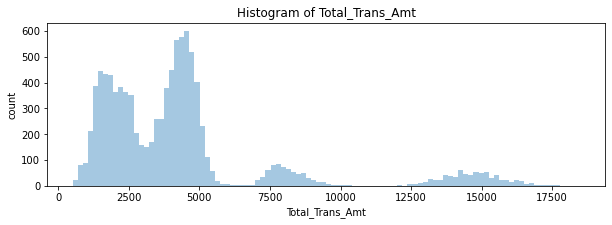

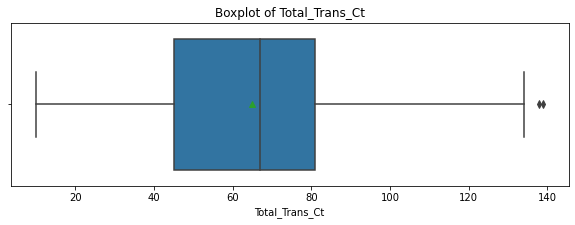

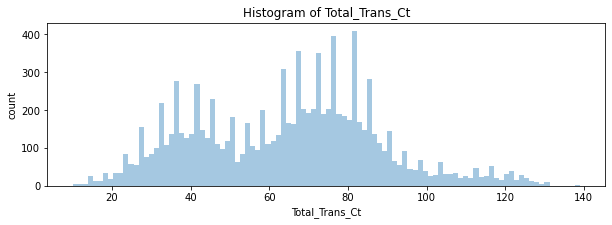

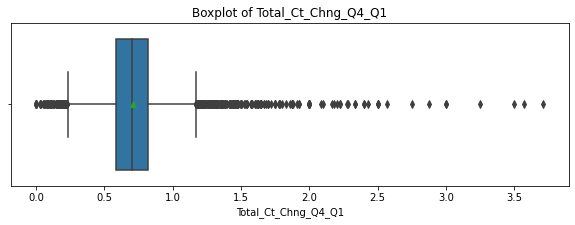

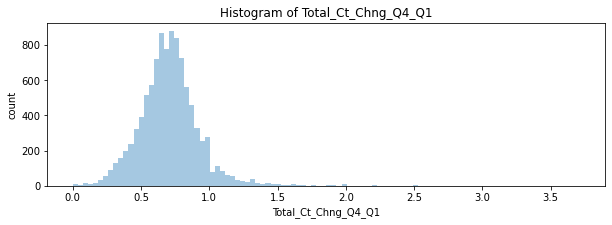

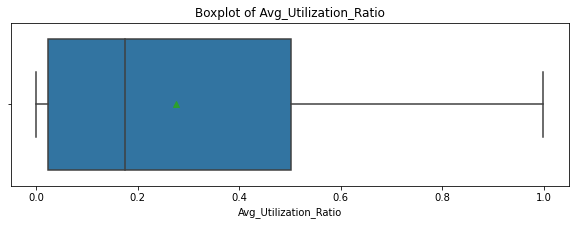

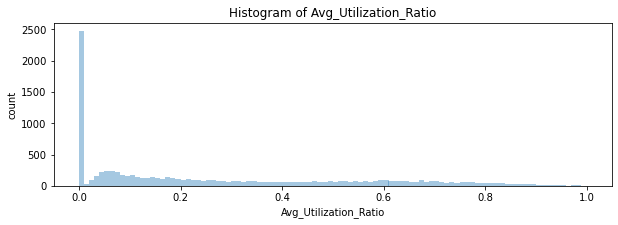

In [13]:
for b in df.columns:
    if type(df[b][0])!=str:        
        plt.figure(figsize=(10, 3))
        sns.boxplot(df[b], showmeans=True)
        plt.title('Boxplot of {}'.format(b))
        plt.show()
        plt.figure(figsize=(10, 3))
        sns.distplot(df[b], kde = False, bins = 100)
        plt.title('Histogram of {}'.format(b))
        plt.ylabel('count')
        plt.show()

From univariate analysis above, we can see that there are outliers in the data. Some observations include:
1. Attrition_Flag, the target variable, has much more existing customers than attrited customers.
2. There are more blue card category.
3. Age is normally distributed.
4. Dependent_count seems normally distributed.
5. Around a quarter of Months_on_book data are around 35-37.
6. Total_Relationship_Count has a relatively uniform distribution.
7. Monts_Inactive_12_mon data are mostly around 1-3.
8. Contacts_Count_12_mon data are normally distributed, most data are around 2-3.
9. Credit_Limit data are right skewed.
10. Around a quarter of Total_Revolving_Bal data are of 0 value.
11. Avg_Open_To_buy data are right skewed.
12. Total_Amt_Chng_Q4_Q1 data are normally distributed. There are few outliers.
13. Total_Trans_Amt data have four peaks.
14. Total_Trans_Ct has two peaks.
15. Total_Ct_Chng_Q4_Q1 data are normally distributed. There are few outliers.
16. Around a quarter of Avg_Utilization_Ratio data are of 0 value.

### Bivariate Analysis

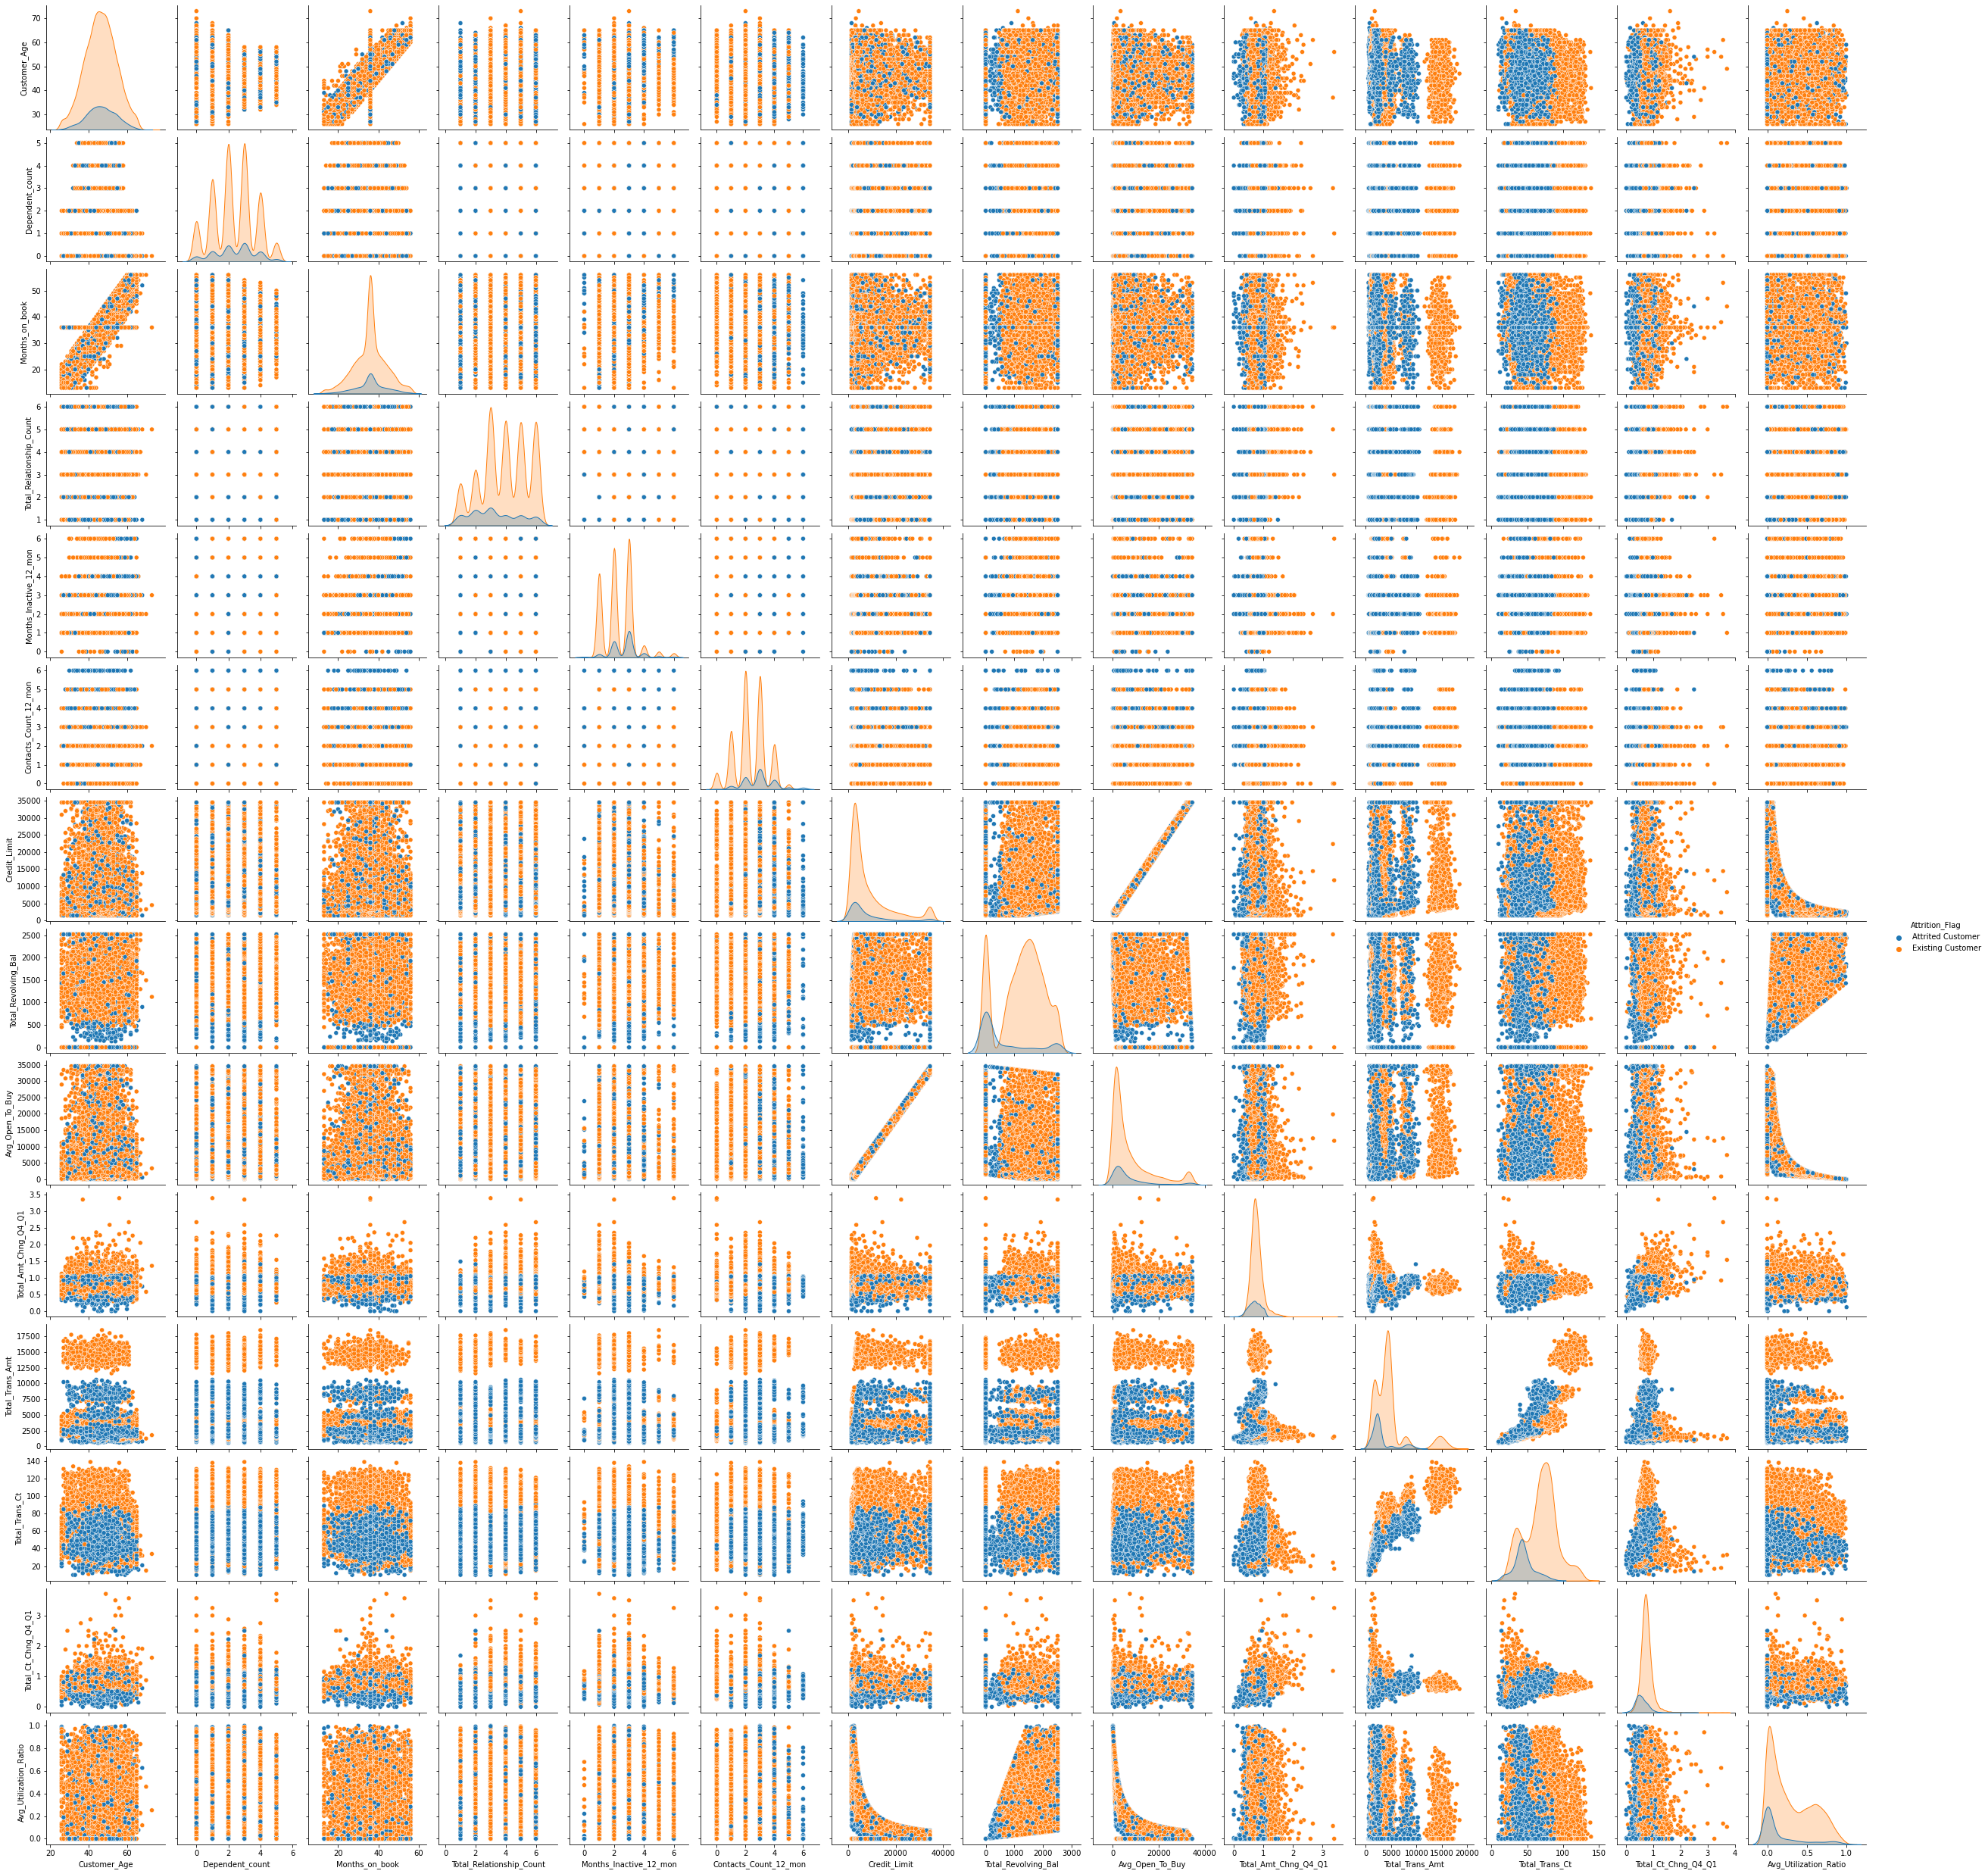

In [14]:
sns.pairplot(df, hue="Attrition_Flag")

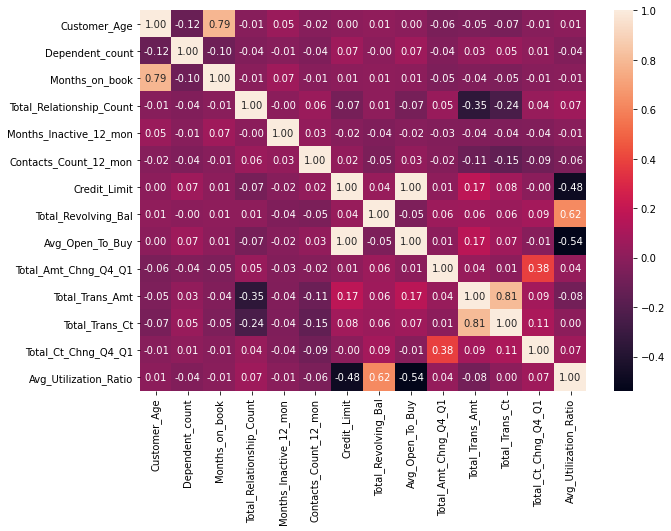

In [15]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, fmt='.2f',)
plt.show()

From the heatmap, we can see that:
1. Credit_Limit and Avg_Open_To_buy are very strongly correlated. One of them must be removed to prevent multicollinearity in the model.
2. Total_Trans_Ct and Total_Trans_Amt are strongly correlated.
3. Months_on_book and Customer_Age are strongly correlated.

In [16]:
#function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, df["Attrition_Flag"], margins=True)
    print("-" * 120)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, df["Attrition_Flag"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

------------------------------------------------------------------------------------------------------------------------
Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


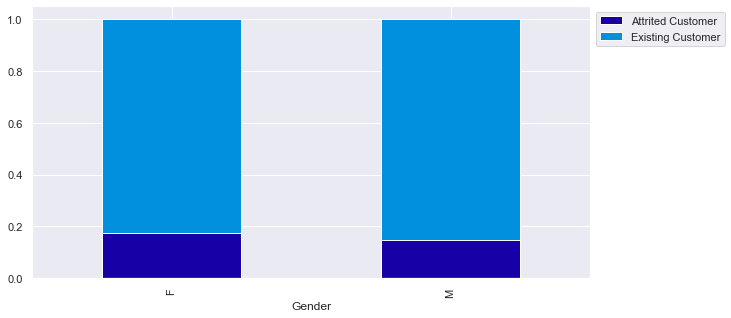

------------------------------------------------------------------------------------------------------------------------
Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


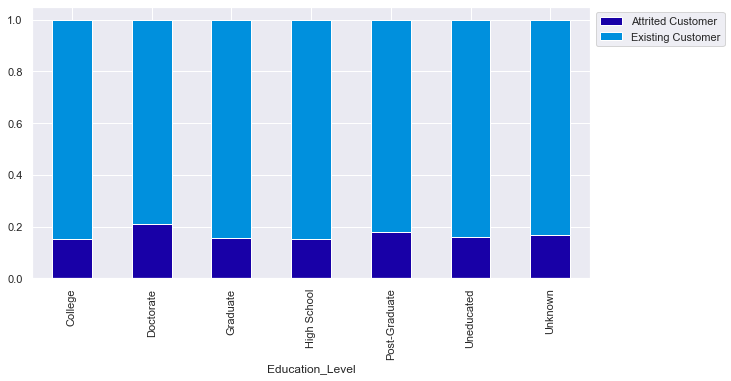

------------------------------------------------------------------------------------------------------------------------
Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


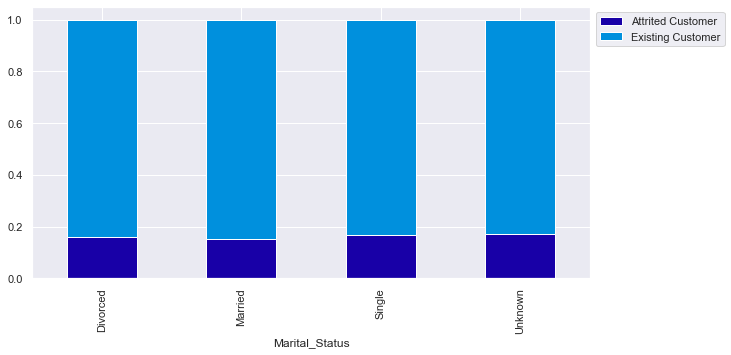

------------------------------------------------------------------------------------------------------------------------
Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$120K +                        126                601    727
$40K - $60K                    271               1519   1790
$60K - $80K                    189               1213   1402
$80K - $120K                   242               1293   1535
Less than $40K                 612               2949   3561
Unknown                        187                925   1112
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


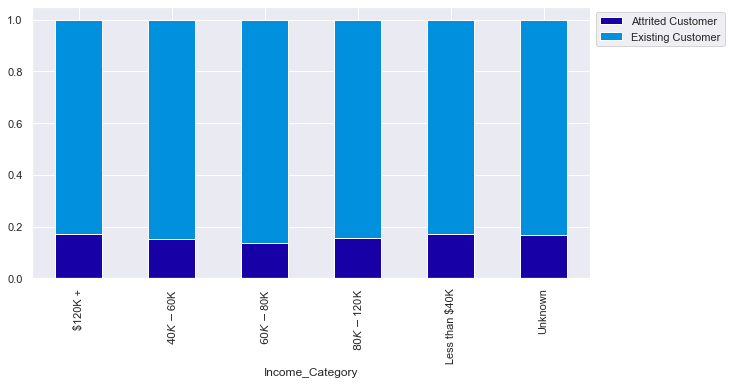

------------------------------------------------------------------------------------------------------------------------
Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


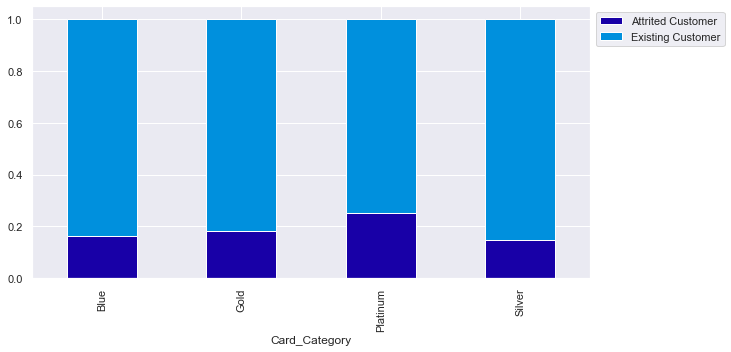

In [17]:
for j in ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']:
    stacked_plot(df[j])

From bivariate analysis of categorical data, we can see that:
1. The percentage of attrited customers among female are higher than male.
2. There are more doctorates among attrited customers. The percentage of post-graduates that are attrited customers are also quite high.
3. The percentage of attrited customers among platinum card holders are higher than those of other card categories.
4. In general, there aren't much difference between the percentage of attrited customers among various categories unless mentioned above.

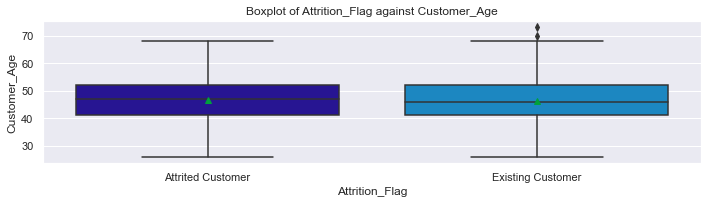

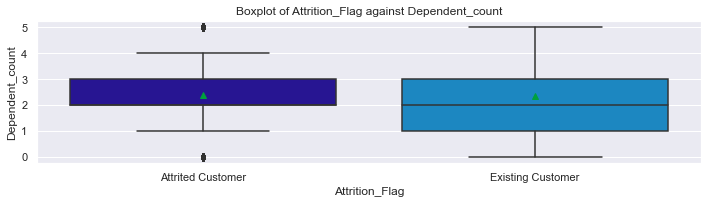

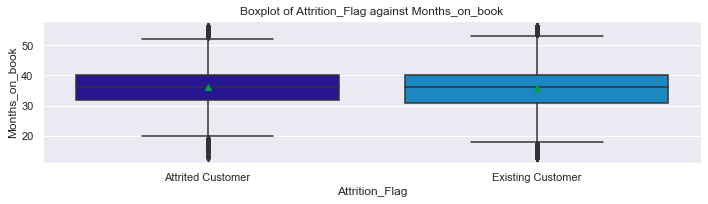

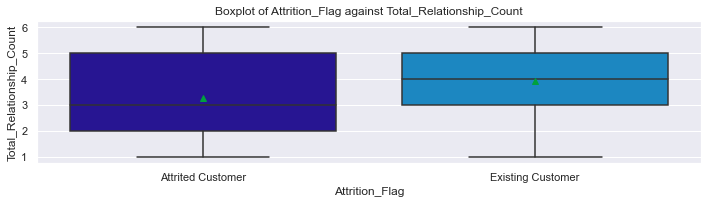

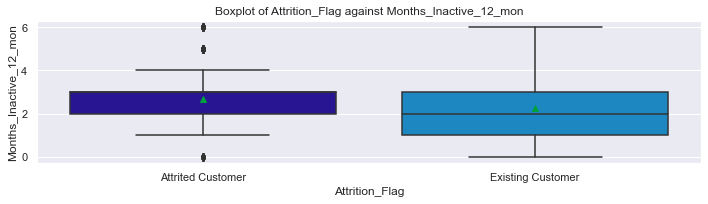

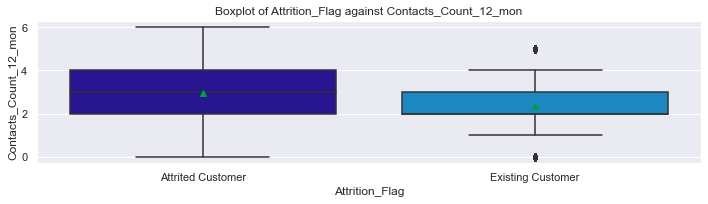

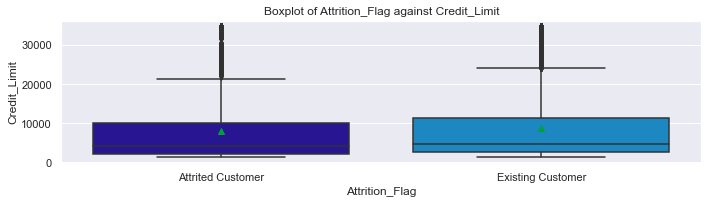

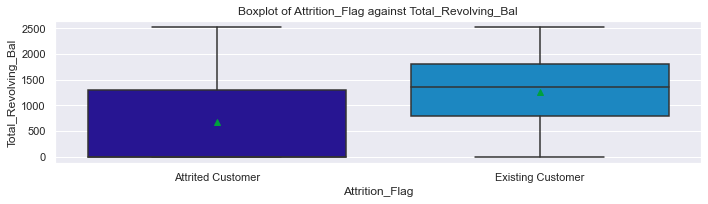

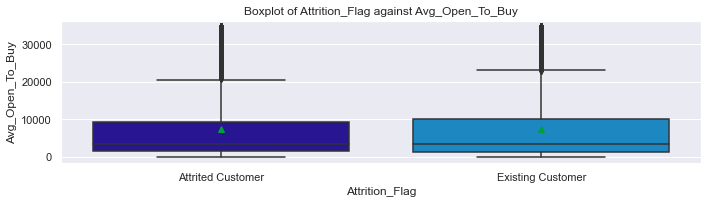

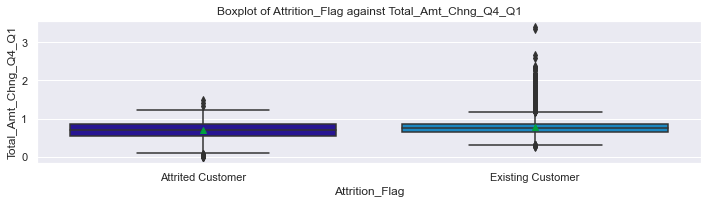

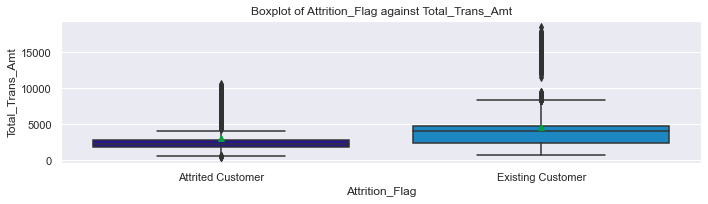

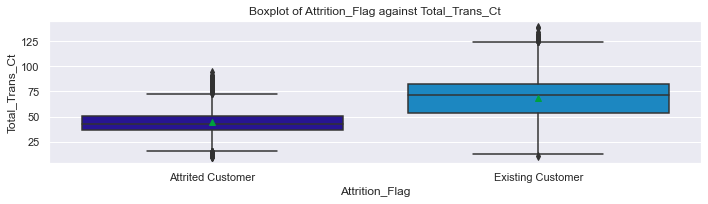

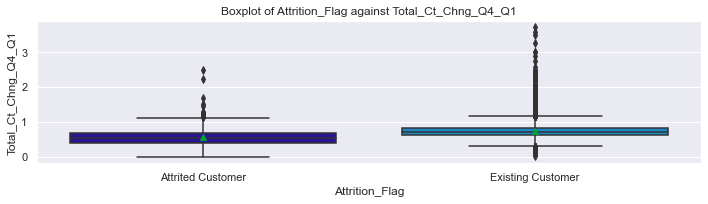

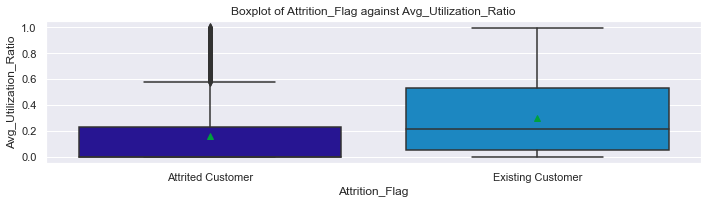

In [18]:
for b in df.columns:
    if type(df[b][0])!=str:        
        plt.figure(figsize=(10, 3))
        sns.boxplot(df['Attrition_Flag'],df[b], showmeans = True)
        plt.title('Boxplot of Attrition_Flag against {}'.format(b))
        plt.tight_layout()
        plt.show()

From bivariate analysis of numerical data, we can see that:
1. Attrited customers generally have lower Total_Relationship_Count
2. Attrited customers have slightly higher number of Months_Inactive_12_mon
3. **Attrited customers have lower Total_Revolving_Bal**
4. **Attrited customers have lower Total_Trans_Amt**
5. **Attrited customers have lower Total_Trans_Ct**
6. **Attrited customers have lower Total_Ct_Chng_Q4_Q1**
7. **Attrited customers have lower Avg_Utilization_Ratio**

These could provide a hint on the factors that impact the target variable greatly, but let's prove if they are correct from the modelling below.

## Data Preparation

In [19]:
#dropping Avg_Open_To_Buy to prevent multicollinearity

df.drop('Avg_Open_To_Buy',axis = 1,inplace=True)
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [21]:
#converting categorical data into dummy

d1 = pd.get_dummies(df['Attrition_Flag'])
d2 = pd.get_dummies(df['Gender'], drop_first=True)
d3 = pd.get_dummies(df['Education_Level'], drop_first=True)
d3.rename(columns={"Unknown": "UnknownEducationLevel"}, inplace=True)
d4 = pd.get_dummies(df['Marital_Status'], drop_first=True)
d4.rename(columns={"Unknown": "UnknownMaritalStatus"}, inplace=True)
d5 = pd.get_dummies(df['Income_Category'], drop_first=True)
d5.rename(columns={"Unknown": "UnknownIncomeCategory"}, inplace=True)
d6 = pd.get_dummies(df['Card_Category'], drop_first=True)

In [22]:
df = pd.concat([df,d1,d2,d3,d4,d5,d6], axis = 1)

df.drop('Attrition_Flag',axis = 1,inplace=True)
df.drop('Existing Customer',axis = 1,inplace=True)
df.drop('Gender',axis = 1,inplace=True)
df.drop('Education_Level',axis = 1,inplace=True)
df.drop('Marital_Status',axis = 1,inplace=True)
df.drop('Income_Category',axis = 1,inplace=True)
df.drop('Card_Category',axis = 1,inplace=True)

df.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Attrited Customer',
       'M', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
       'Uneducated', 'UnknownEducationLevel', 'Married', 'Single',
       'UnknownMaritalStatus', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       'Less than $40K', 'UnknownIncomeCategory', 'Gold', 'Platinum',
       'Silver'],
      dtype='object')

In [23]:
#splitting the data into train and test sets

train, test = train_test_split(df, test_size=0.30, random_state=1, stratify=df['Attrited Customer'])
print(train.shape, test.shape)

(7088, 32) (3039, 32)


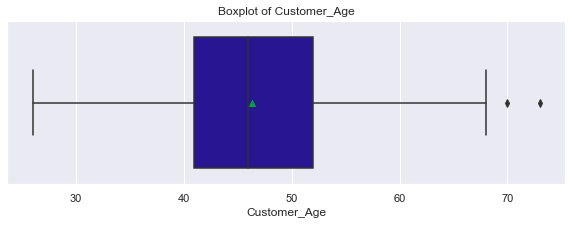

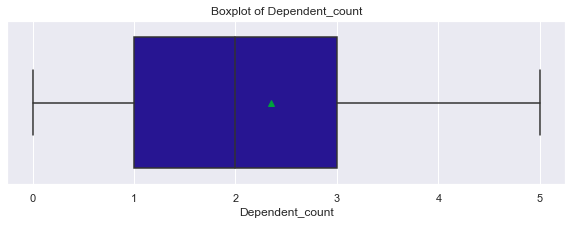

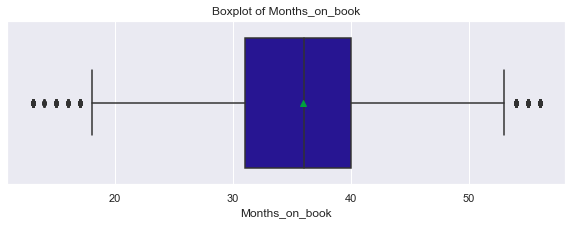

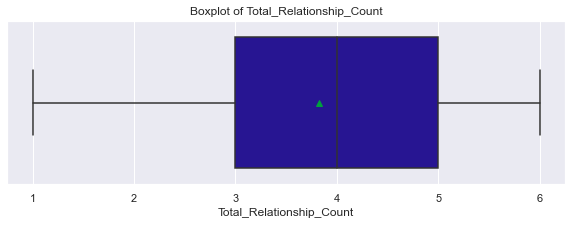

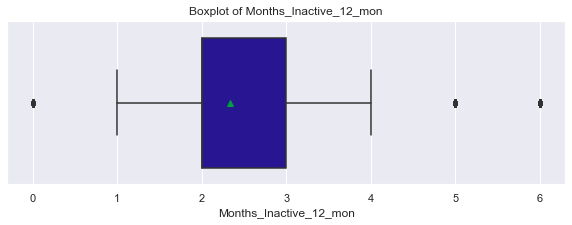

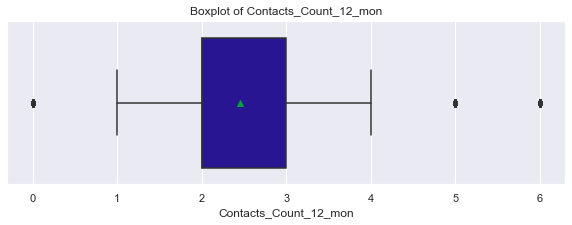

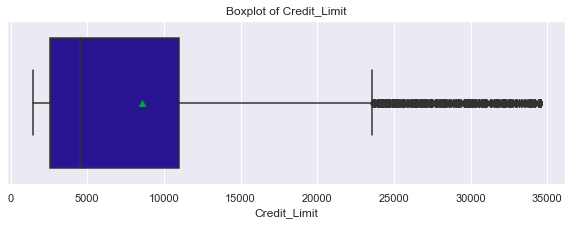

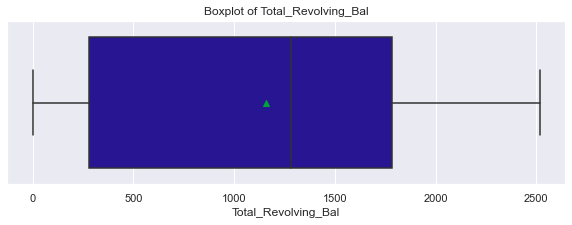

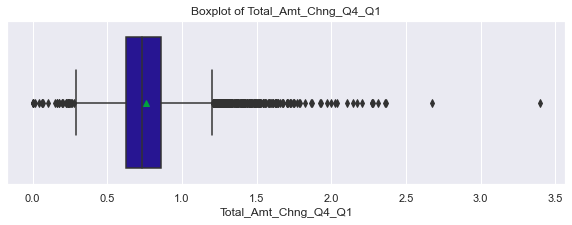

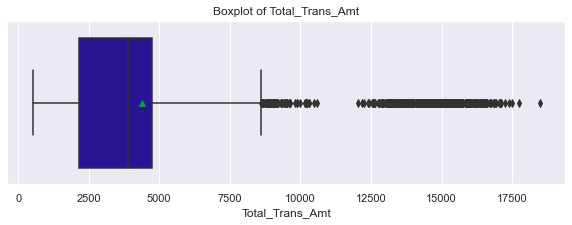

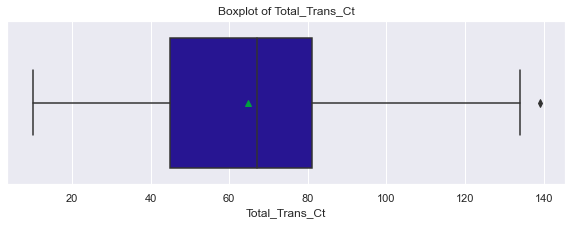

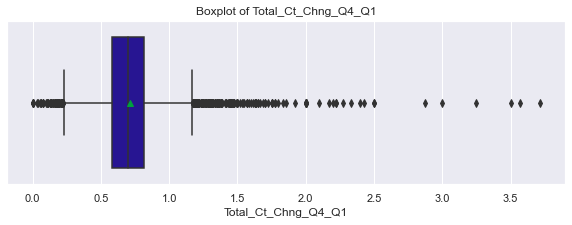

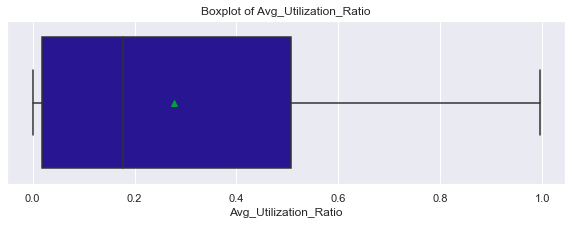

In [24]:
#checking on outliers in train data
for x in ['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']:       
    plt.figure(figsize=(10, 3))
    sns.boxplot(train[x], showmeans=True)
    plt.title('Boxplot of {}'.format(x))
    plt.show()

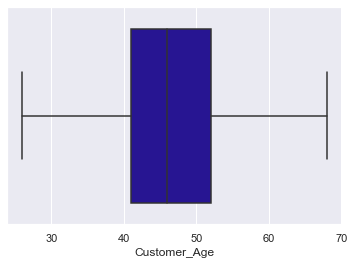

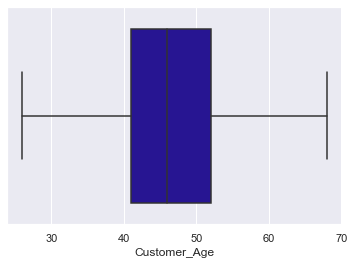

In [25]:
#outlier treatment for Customer_Age

ULage = train['Customer_Age'].quantile(0.75) + 1.5 * (train['Customer_Age'].quantile(0.75) - train['Customer_Age'].quantile(0.25)) #UL = Upper Limit

train.drop(train.loc[train['Customer_Age'] > ULage].index, axis=0, inplace=True)
test.drop(test.loc[test['Customer_Age'] > ULage].index, axis=0, inplace=True) #applied the same treatment to test dataset to prevent data leakage

#check if outlier has been get rid of
sns.boxplot(train['Customer_Age'])
plt.show()
sns.boxplot(test['Customer_Age'])
plt.show()

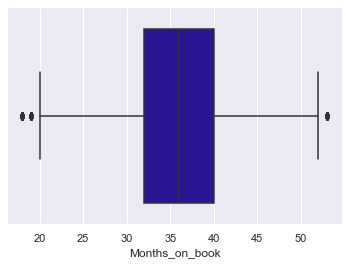

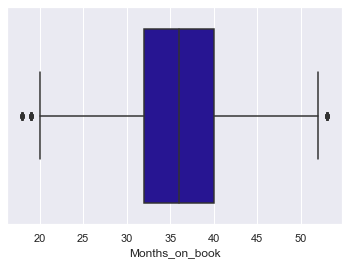

In [26]:
#outlier treatment for Months_on_book

UL2 = train['Months_on_book'].quantile(0.75) + 1.5 * (train['Months_on_book'].quantile(0.75) - train['Months_on_book'].quantile(0.25)) #UL = Upper Limit
LL2 = train['Months_on_book'].quantile(0.25) - 1.5 * (train['Months_on_book'].quantile(0.75) - train['Months_on_book'].quantile(0.25)) #LL = Lower Limit

train.drop(train.loc[train['Months_on_book'] > UL2].index, axis=0, inplace=True)
train.drop(train.loc[train['Months_on_book'] < LL2].index, axis=0, inplace=True)
test.drop(test.loc[test['Months_on_book'] > UL2].index, axis=0, inplace=True)
test.drop(test.loc[test['Months_on_book'] < LL2].index, axis=0, inplace=True)

#check if outlier has been get rid of
sns.boxplot(train['Months_on_book'])
plt.show()
sns.boxplot(test['Months_on_book'])
plt.show()

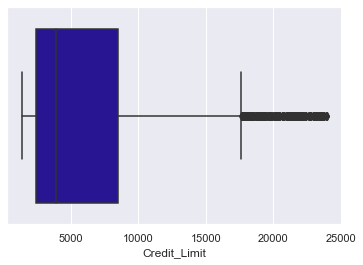

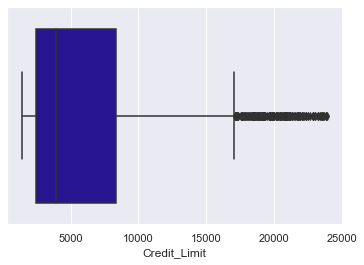

In [27]:
#outlier treatment for Credit_Limit

UL3 = train['Credit_Limit'].quantile(0.75) + 1.5 * (train['Credit_Limit'].quantile(0.75) - train['Credit_Limit'].quantile(0.25)) #UL = Upper Limit

train.drop(train.loc[train['Credit_Limit'] > UL3].index, axis=0, inplace=True)
test.drop(test.loc[test['Credit_Limit'] > UL3].index, axis=0, inplace=True)

#check if outlier has been get rid of
sns.boxplot(train['Credit_Limit'])
plt.show()
sns.boxplot(test['Credit_Limit'])
plt.show()

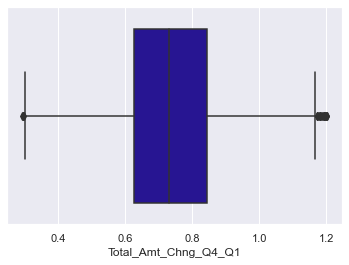

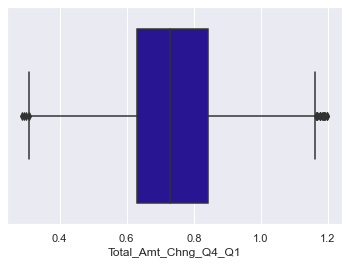

In [28]:
#outlier treatment for Total_Amt_Chng_Q4_Q1

UL4 = train['Total_Amt_Chng_Q4_Q1'].quantile(0.75) + 1.5 * (train['Total_Amt_Chng_Q4_Q1'].quantile(0.75) - train['Total_Amt_Chng_Q4_Q1'].quantile(0.25)) #UL = Upper Limit
LL4 = train['Total_Amt_Chng_Q4_Q1'].quantile(0.25) - 1.5 * (train['Total_Amt_Chng_Q4_Q1'].quantile(0.75) - train['Total_Amt_Chng_Q4_Q1'].quantile(0.25)) #LL = Lower Limit

train.drop(train.loc[train['Total_Amt_Chng_Q4_Q1'] > UL4].index, axis=0, inplace=True)
train.drop(train.loc[train['Total_Amt_Chng_Q4_Q1'] < LL4].index, axis=0, inplace=True)
test.drop(test.loc[test['Total_Amt_Chng_Q4_Q1'] > UL4].index, axis=0, inplace=True)
test.drop(test.loc[test['Total_Amt_Chng_Q4_Q1'] < LL4].index, axis=0, inplace=True)

#check if outlier has been get rid of
sns.boxplot(train['Total_Amt_Chng_Q4_Q1'])
plt.show()
sns.boxplot(test['Total_Amt_Chng_Q4_Q1'])
plt.show()

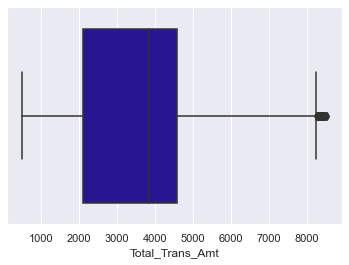

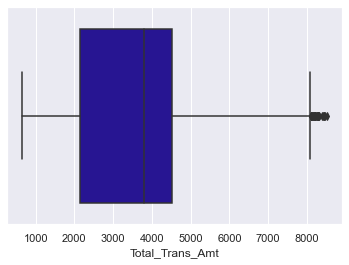

In [29]:
#outlier treatment for Total_Trans_Amt

UL5 = train['Total_Trans_Amt'].quantile(0.75) + 1.5 * (train['Total_Trans_Amt'].quantile(0.75) - train['Total_Trans_Amt'].quantile(0.25)) #UL = Upper Limit

train.drop(train.loc[train['Total_Trans_Amt'] > UL5].index, axis=0, inplace=True)
test.drop(test.loc[test['Total_Trans_Amt'] > UL5].index, axis=0, inplace=True)

#check if outlier has been get rid of
sns.boxplot(train['Total_Trans_Amt'])
plt.show()
sns.boxplot(test['Total_Trans_Amt'])
plt.show()

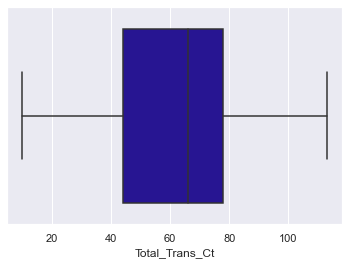

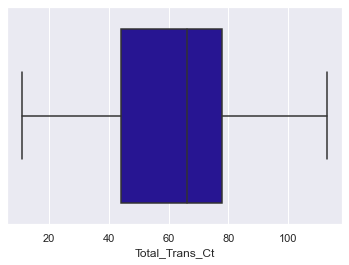

In [30]:
#outlier treatment for Total_Trans_Ct

UL6 = train['Total_Trans_Ct'].quantile(0.75) + 1.5 * (train['Total_Trans_Ct'].quantile(0.75) - train['Total_Trans_Ct'].quantile(0.25)) #UL = Upper Limit

train.drop(train.loc[train['Total_Trans_Ct'] > UL6].index, axis=0, inplace=True)
test.drop(test.loc[test['Total_Trans_Ct'] > UL6].index, axis=0, inplace=True)

#check if outlier has been get rid of
sns.boxplot(train['Total_Trans_Ct'])
plt.show()
sns.boxplot(test['Total_Trans_Ct'])
plt.show()

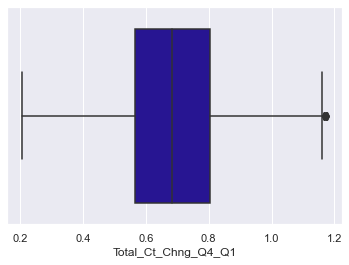

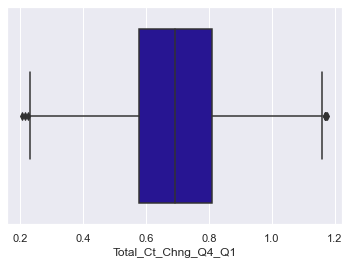

In [31]:
#outlier treatment for Total_Ct_Chng_Q4_Q1

UL7 = train['Total_Ct_Chng_Q4_Q1'].quantile(0.75) + 1.5 * (train['Total_Ct_Chng_Q4_Q1'].quantile(0.75) - train['Total_Ct_Chng_Q4_Q1'].quantile(0.25)) #UL = Upper Limit
LL7 = train['Total_Ct_Chng_Q4_Q1'].quantile(0.25) - 1.5 * (train['Total_Ct_Chng_Q4_Q1'].quantile(0.75) - train['Total_Ct_Chng_Q4_Q1'].quantile(0.25)) #LL = Lower Limit

train.drop(train.loc[train['Total_Ct_Chng_Q4_Q1'] > UL7].index, axis=0, inplace=True)
train.drop(train.loc[train['Total_Ct_Chng_Q4_Q1'] < LL7].index, axis=0, inplace=True)
test.drop(test.loc[test['Total_Ct_Chng_Q4_Q1'] > UL7].index, axis=0, inplace=True)
test.drop(test.loc[test['Total_Ct_Chng_Q4_Q1'] < LL7].index, axis=0, inplace=True)

#check if outlier has been get rid of
sns.boxplot(train['Total_Ct_Chng_Q4_Q1'])
plt.show()
sns.boxplot(test['Total_Ct_Chng_Q4_Q1'])
plt.show()

In [32]:
#separating target and non-target variables

X_train = train.drop('Attrited Customer',axis=1)
X_test = test.drop('Attrited Customer',axis=1)
y_train = train['Attrited Customer']
y_test = test['Attrited Customer']

## Model Building

### Logistic Regression

As per discussed above, the metric of interest in the problem is recall. 

In [33]:
#confusion matrix function
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [34]:
#function to calculate metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    #F1-score of the model
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1 score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1 score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [92]:
#BASIC LOGISTIC REGRESSION

model1 = LogisticRegression(solver="liblinear",random_state=1)
model1.fit(X_train,y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [93]:
model1score = get_metrics_score(model1)

Accuracy on training set :  0.8940733772342427
Accuracy on test set :  0.8898419864559819
Recall on training set :  0.5451505016722408
Recall on test set :  0.527027027027027
Precision on training set :  0.7593167701863354
Precision on test set :  0.7386363636363636
F1 score on training set :  0.6346528228423102
F1 score on test set :  0.6151419558359622


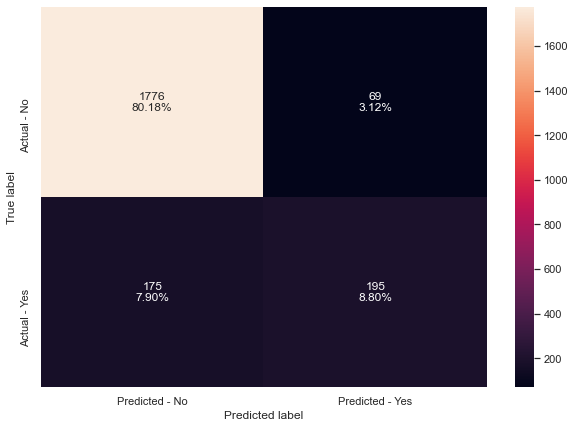

In [94]:
make_confusion_matrix(model1,y_test)

In [95]:
#LOGISTIC REGRESSION WITH SMOTE (UPSAMPLING)

from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train.values, y_train.values)

print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))

print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

model1b = LogisticRegression(solver="liblinear",random_state=1)
model1b.fit(X_train_res, y_train_res)

Before UpSampling, counts of label '1': 897
Before UpSampling, counts of label '0': 4418 

After UpSampling, counts of label '1': 4418
After UpSampling, counts of label '0': 4418 

After UpSampling, the shape of train_X: (8836, 31)
After UpSampling, the shape of train_y: (8836,) 



LogisticRegression(random_state=1, solver='liblinear')

In [96]:
model1bscore = get_metrics_score(model1b)

Accuracy on training set :  0.8491063029162746
Accuracy on test set :  0.8338600451467268
Recall on training set :  0.835005574136009
Recall on test set :  0.8324324324324325
Precision on training set :  0.533856022808268
Precision on test set :  0.501628664495114
F1 score on training set :  0.651304347826087
F1 score on test set :  0.6260162601626016


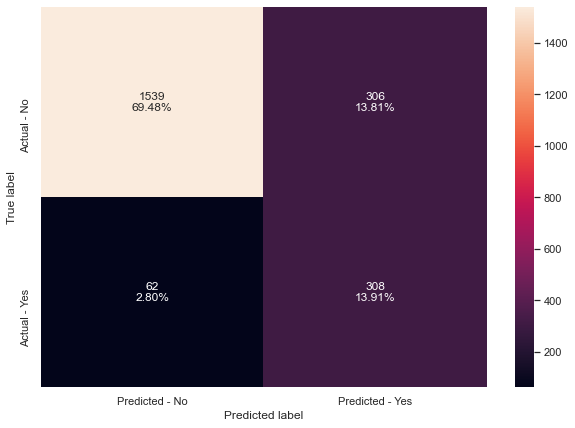

In [97]:
make_confusion_matrix(model1b,y_test)

In [98]:
#LOGISTIC REGRESSION WITH IMBLEARN RANDOM UNDERSAMPLING

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=1)
X_rus, y_rus = rus.fit_resample(X_train.values, y_train.values)

print("Before DownSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before DownSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print("After DownSampling, counts of label '1': {}".format(sum(y_rus==1)))
print("After DownSampling, counts of label '0': {} \n".format(sum(y_rus==0)))

print('After DownSampling, the shape of train_X: {}'.format(X_rus.shape))
print('After DownSampling, the shape of train_y: {} \n'.format(y_rus.shape))

model1c = LogisticRegression(solver="liblinear",random_state=1)
model1c.fit(X_rus, y_rus)

Before DownSampling, counts of label '1': 897
Before DownSampling, counts of label '0': 4418 

After DownSampling, counts of label '1': 897
After DownSampling, counts of label '0': 897 

After DownSampling, the shape of train_X: (1794, 31)
After DownSampling, the shape of train_y: (1794,) 



LogisticRegression(random_state=1, solver='liblinear')

In [99]:
model1cscore = get_metrics_score(model1c)

Accuracy on training set :  0.8381937911571026
Accuracy on test set :  0.8189616252821671
Recall on training set :  0.842809364548495
Recall on test set :  0.8378378378378378
Precision on training set :  0.512542372881356
Precision on test set :  0.47619047619047616
F1 score on training set :  0.6374367622259697
F1 score on test set :  0.6072477962781586


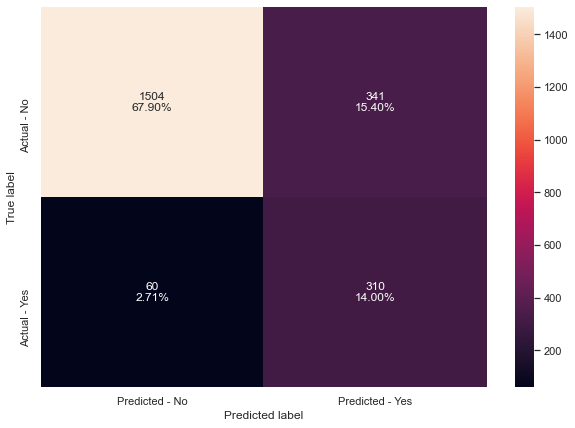

In [100]:
make_confusion_matrix(model1c,y_test)

In [101]:
#LOGISTIC REGRESSION WITH IMBLEARN RANDOM OVERSAMPLING

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=1)

X_ros, y_ros = ros.fit_resample(X_train.values, y_train.values)

print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print("After UpSampling, counts of label '1': {}".format(sum(y_ros==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_ros==0)))

print('After UpSampling, the shape of train_X: {}'.format(X_ros.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_ros.shape))

model1d = LogisticRegression(solver="liblinear",random_state=1)
model1d.fit(X_ros, y_ros)

Before UpSampling, counts of label '1': 897
Before UpSampling, counts of label '0': 4418 

After UpSampling, counts of label '1': 4418
After UpSampling, counts of label '0': 4418 

After UpSampling, the shape of train_X: (8836, 31)
After UpSampling, the shape of train_y: (8836,) 



LogisticRegression(random_state=1, solver='liblinear')

In [102]:
model1dscore = get_metrics_score(model1d)

Accuracy on training set :  0.8506114769520225
Accuracy on test set :  0.8406320541760722
Recall on training set :  0.8584169453734671
Recall on test set :  0.8594594594594595
Precision on training set :  0.5358385525400139
Precision on test set :  0.5137318255250404
F1 score on training set :  0.6598114824335904
F1 score on test set :  0.6430738119312437


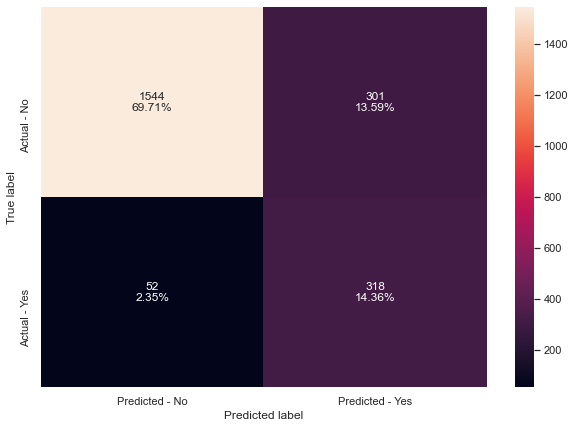

In [103]:
make_confusion_matrix(model1d,y_test)

In [104]:
#LOGISTIC REGRESSION WITH TOMEKLINKS

from imblearn.under_sampling import TomekLinks

tl = TomekLinks()

X_tl, y_tl= tl.fit_resample(X_train.values, y_train.values)

print("Before DownSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before DownSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print("After DownSampling, counts of label '1': {}".format(sum(y_tl==1)))
print("After DownSampling, counts of label '0': {} \n".format(sum(y_tl==0)))

print('After DownSampling, the shape of train_X: {}'.format(X_tl.shape))
print('After DownSampling, the shape of train_y: {} \n'.format(y_tl.shape))

model1e = LogisticRegression(solver="liblinear",random_state=1)
model1e.fit(X_tl, y_tl)

Before DownSampling, counts of label '1': 897
Before DownSampling, counts of label '0': 4418 

After DownSampling, counts of label '1': 897
After DownSampling, counts of label '0': 4237 

After DownSampling, the shape of train_X: (5134, 31)
After DownSampling, the shape of train_y: (5134,) 



LogisticRegression(random_state=1, solver='liblinear')

In [105]:
model1escore = get_metrics_score(model1e)

Accuracy on training set :  0.8914393226716839
Accuracy on test set :  0.8889390519187359
Recall on training set :  0.5574136008918618
Recall on test set :  0.5459459459459459
Precision on training set :  0.7352941176470589
Precision on test set :  0.7214285714285714
F1 score on training set :  0.6341154090044387
F1 score on test set :  0.6215384615384615


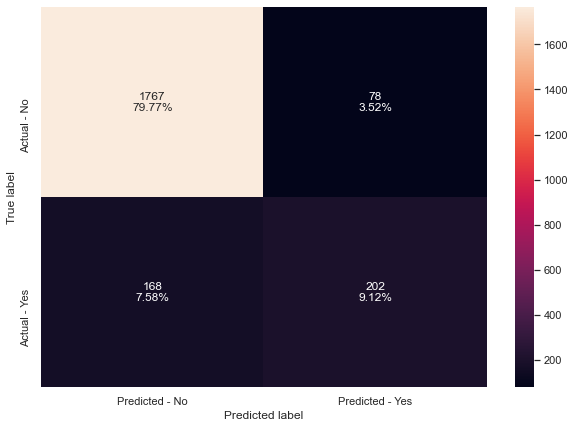

In [106]:
make_confusion_matrix(model1e,y_test)

In [50]:
#REGULARIZATION
#Let's apply regularization techniques to the best performing models: IMBLearn Random Oversampling & Undersampling and SMOTE

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#RIDGE REGRESSION
#SMOTE

ridge1 = Ridge(alpha=.3)
ridge1.fit(X_train_res,y_train_res)
print("Ridge model:", (ridge1.coef_))

print("Train score : ",ridge1.score(X_train_res, y_train_res))
print("Test score : ",ridge1.score(X_test, y_test))

Ridge model: [-1.45779003e-04  1.39375322e-02 -1.68555494e-03 -4.37448153e-02
  6.59793178e-02  6.16237386e-02 -3.69396954e-06 -9.74668882e-05
 -6.17911976e-02  9.83984718e-05 -1.87213059e-02 -4.57700471e-01
 -3.81455540e-02 -8.50818973e-02  1.57863615e-02 -1.77833334e-02
  7.99178259e-03  6.16049582e-02  1.14450133e-03  5.57020119e-03
 -5.33450300e-02  6.88700516e-03  4.62277969e-02 -6.76776595e-02
 -6.35606528e-02 -4.56035849e-02 -4.65104401e-02 -5.82387021e-02
  1.57417383e-01  3.93190414e-01 -5.59795647e-02]
Train score :  0.5724273745416761
Test score :  0.12560260158997416


In [51]:
#it seems that the performance does not improve. let's try using a different alpha value

ridge1b = Ridge(alpha=.7)
ridge1b.fit(X_train_res,y_train_res)
print("Ridge model:", (ridge1b.coef_))

print("Train score : ",ridge1b.score(X_train_res, y_train_res))
print("Test score : ",ridge1b.score(X_test, y_test))


Ridge model: [-1.48323612e-04  1.39485692e-02 -1.68223862e-03 -4.37450614e-02
  6.59839063e-02  6.16446248e-02 -3.66708326e-06 -9.75687511e-05
 -6.20038102e-02  9.84539490e-05 -1.87272991e-02 -4.56937734e-01
 -3.78985108e-02 -8.49451982e-02  1.60074424e-02 -1.78011008e-02
  7.96726851e-03  6.14943331e-02  1.08718792e-03  5.54406054e-03
 -5.32893038e-02  6.94808451e-03  4.62053093e-02 -6.72331754e-02
 -6.32854341e-02 -4.53624402e-02 -4.59504100e-02 -5.77816028e-02
  1.54766274e-01  3.67269332e-01 -5.59845082e-02]
Train score :  0.5724225732801141
Test score :  0.1256495207733639


In [52]:
#it seems that the value is not improved. this is because the coefficients of the model before regularization do not differ that much

model1b.coef_

array([[ 4.77138673e-02,  3.17996678e-01, -1.33417370e-02,
        -2.67492188e-01,  7.91687961e-01,  7.25735529e-01,
        -2.54503972e-07, -8.23666027e-04,  2.07092271e-01,
         8.33567759e-04, -1.53202752e-01, -1.28148967e+00,
        -9.77824540e-02, -2.79648176e-01,  1.98401099e-01,
        -6.82045866e-02,  1.85694853e-01,  4.65656689e-01,
         6.77195125e-02,  4.93341293e-02, -4.94203283e-02,
         4.47450529e-01,  4.27562556e-01,  1.70013223e-01,
        -9.83749708e-02, -8.82095333e-02,  5.87785936e-01,
         2.51216612e-01,  1.03259197e-01,  3.20570215e-02,
        -1.18696533e-01]])

In [53]:
#RIDGE REGRESSION
#IMBlearn Undersampling

ridge2 = Ridge(alpha=.3)
ridge2.fit(X_rus,y_rus)
print("Ridge model:", (ridge2.coef_))

print("Train score : ",ridge2.score(X_rus,y_rus))
print("Test score : ",ridge2.score(X_test, y_test))

#negative improvement for both alpha of 0.3 and 0.7 (both have been tested)

Ridge model: [ 5.23879669e-04  9.29609218e-03 -2.78865314e-03 -4.08511175e-02
  6.26791538e-02  6.11115513e-02 -6.02978149e-06 -8.72109177e-05
 -5.99809998e-02  9.05599542e-05 -1.84164487e-02 -3.34627673e-01
 -1.08133510e-01 -9.10799942e-02  3.93777818e-02 -1.58918032e-02
  6.48307791e-03  1.35857898e-01 -1.05563636e-02  2.49324840e-03
 -1.79039443e-02  2.64566649e-02  6.17758071e-02 -1.73927164e-02
 -1.70723026e-02  1.54221559e-02 -5.32227871e-03 -3.35548217e-02
  2.94215175e-01  2.28670204e-01  3.14725441e-02]
Train score :  0.5561196769253505
Test score :  0.1074469479251845


In [54]:
#RIDGE REGRESSION
#IMBlearn Oversampling

ridge3 = Ridge(alpha=.3)
ridge3.fit(X_ros,y_ros)
print("Ridge model:", (ridge3.coef_))

print("Train score : ",ridge3.score(X_ros,y_ros))
print("Test score : ",ridge3.score(X_test, y_test))

#negative improvement for both alpha of 0.3 and 0.7 (both have been tested)

Ridge model: [-4.10119498e-04  7.02196008e-03 -1.56383354e-03 -4.06872442e-02
  5.74083576e-02  5.88344358e-02 -6.50821730e-06 -7.91815519e-05
 -4.42744754e-02  9.97717132e-05 -1.87629633e-02 -3.84716336e-01
 -9.56812004e-02 -7.35637304e-02  2.48519849e-02 -7.26188536e-03
  1.64783001e-02  7.40250237e-02 -1.35765091e-04  1.78576356e-02
 -4.13678868e-02 -3.09529625e-06  3.97955194e-02 -6.39859146e-02
 -7.19887168e-02 -3.46694674e-02 -4.20324127e-02 -5.30424196e-02
  1.77040250e-01  2.53620563e-01 -6.22948135e-02]
Train score :  0.5498472494314993
Test score :  0.11547189891739906


In [55]:
#LASSO REGRESSION
#SMOTE

lasso1 = Lasso(alpha=0.3)
lasso1.fit(X_train_res,y_train_res)
print ("Lasso model:", (lasso1.coef_))

print("Train score : ",lasso1.score(X_train_res,y_train_res))
print("Test score : ",lasso1.score(X_test, y_test))

#negative improvement for both alpha of 0.3 and 0.7 (both have been tested)

Lasso model: [-0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.54748254e-06 -1.42044869e-04
 -0.00000000e+00  8.93274637e-05 -1.99617136e-02 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00]
Train score :  0.47272571735261937
Test score :  -0.09314511551879123


In [56]:
#LASSO REGRESSION
#IMBlearn Undersampling

lasso2 = Lasso(alpha=0.3)
lasso2.fit(X_rus,y_rus)
print ("Lasso model:", (lasso2.coef_))

print("Train score : ",lasso2.score(X_rus,y_rus))
print("Test score : ",lasso2.score(X_test, y_test))

#negative improvement for both alpha of 0.3 and 0.7 (both have been tested)

Lasso model: [-0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -6.38258357e-06 -1.40672304e-04
 -0.00000000e+00  8.54094410e-05 -1.95627753e-02 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]
Train score :  0.4649398204631835
Test score :  -0.08978501535226235


In [57]:
#LASSO REGRESSION
#IMBlearn Oversampling

lasso3 = Lasso(alpha=0.3)
lasso3.fit(X_ros,y_ros)
print ("Lasso model:", (lasso3.coef_))

print("Train score : ",lasso3.score(X_ros,y_ros))
print("Test score : ",lasso3.score(X_test, y_test))

#negative improvement for both alpha of 0.3 and 0.7 (both have been tested)

Lasso model: [-0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -6.53597050e-06 -1.30713281e-04
 -0.00000000e+00  9.20648845e-05 -1.98364778e-02 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00]
Train score :  0.4616713700504653
Test score :  -0.08949920382326115


From the tests above, we can see that regularization does not help in model improvement. This is because the coefficients of the model before regularization do not differ that much in the first place.

In [107]:
# defining list of models
models = [model1,model1b,model1c,model1d,model1e]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_train.append(np.round(j[6],2))
    f1_test.append(np.round(j[7],2))
    

comparison_frame1 = pd.DataFrame({'Model':[
    'Logistic Regression','Logistic Regression with SMOTE','Logistic Regression with IMBlearn Random Undersampling',
    'Logistic Regression with IMBlearn Random Oversampling','Logistic Regression with TomekLinks'], 
                                 
    'Train_Accuracy': acc_train,
    'Test_Accuracy': acc_test,
    'Train_Recall': recall_train,
    'Test_Recall': recall_test,
    'Train_Precision': precision_train,
    'Test_Precision': precision_test,
    'Train_F1': f1_train,
    'Test_F1': f1_test,
                                
                                })

comparison_frame1

Model  Train_Accuracy  \
0                                Logistic Regression            0.89   
1                     Logistic Regression with SMOTE            0.85   
2  Logistic Regression with IMBlearn Random Under...            0.84   
3  Logistic Regression with IMBlearn Random Overs...            0.85   
4                Logistic Regression with TomekLinks            0.89   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0           0.89          0.55         0.53             0.76            0.74   
1           0.83          0.84         0.83             0.53            0.50   
2           0.82          0.84         0.84             0.51            0.48   
3           0.84          0.86         0.86             0.54            0.51   
4           0.89          0.56         0.55             0.74            0.72   

   Train_F1  Test_F1  
0      0.63     0.62  
1      0.65     0.63  
2      0.64     0.61  
3      0.66     0.64  
4      0.63     0.62

From the various models tested above, it can be concluded that among logistic regression models, the most reliable one is logistic regression with IMBlearn random oversampling/upsampling without regularization due to it's high recall value. The model's accuracy and F1 score are also the most reliable.

### Bagging

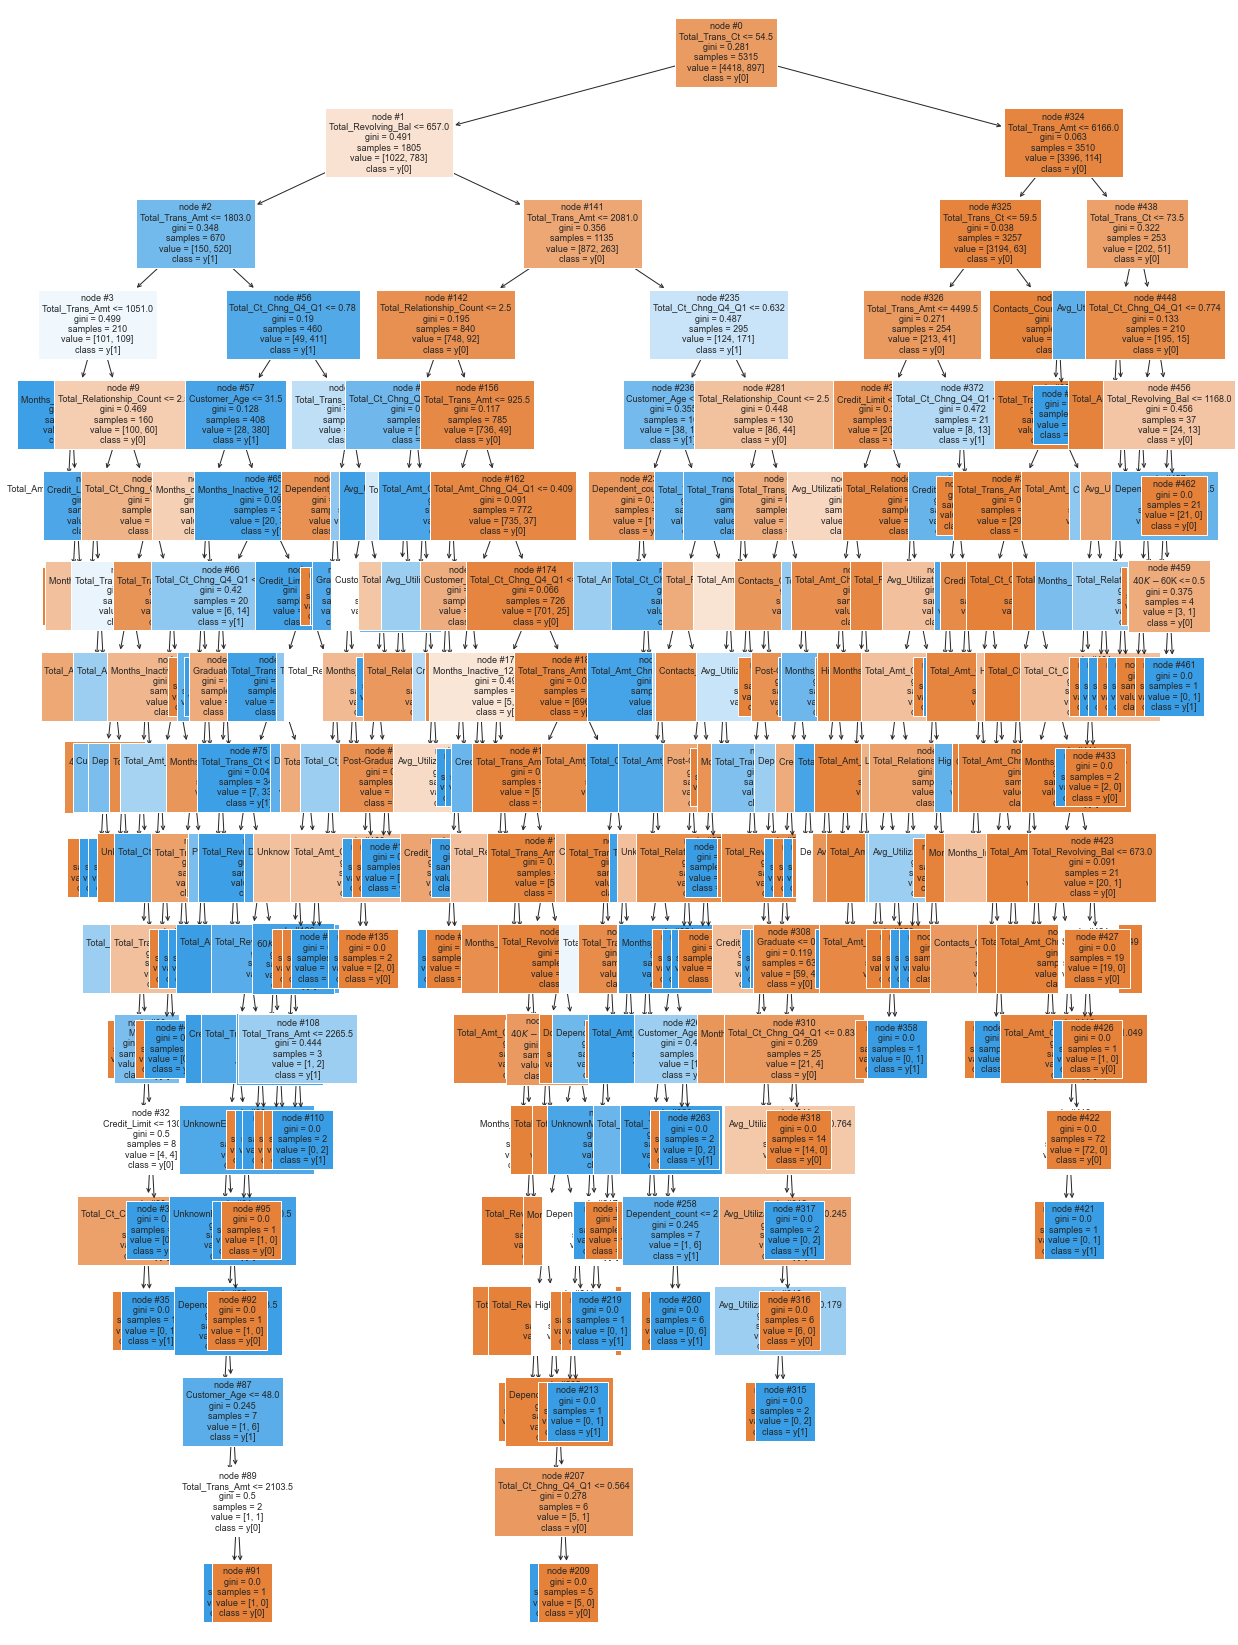

In [59]:
#DECISION TREE MODEL

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model2 = DecisionTreeClassifier(criterion = 'gini', random_state=1)
model2.fit(X_train, y_train)

feature_names = list(X_train.columns)
plt.figure(figsize=(20,30))
tree.plot_tree(model2,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [60]:
model2score = get_metrics_score(model2)

Accuracy on training set :  1.0
Accuracy on test set :  0.9255079006772009
Recall on training set :  1.0
Recall on test set :  0.7837837837837838
Precision on training set :  1.0
Precision on test set :  0.7733333333333333
F1 score on training set :  1.0
F1 score on test set :  0.7785234899328859


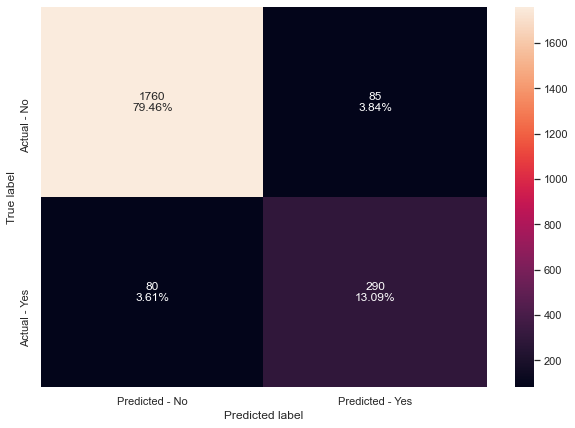

In [61]:
#as expected, overfitting tends to happen with decision tree

make_confusion_matrix(model2,y_test)

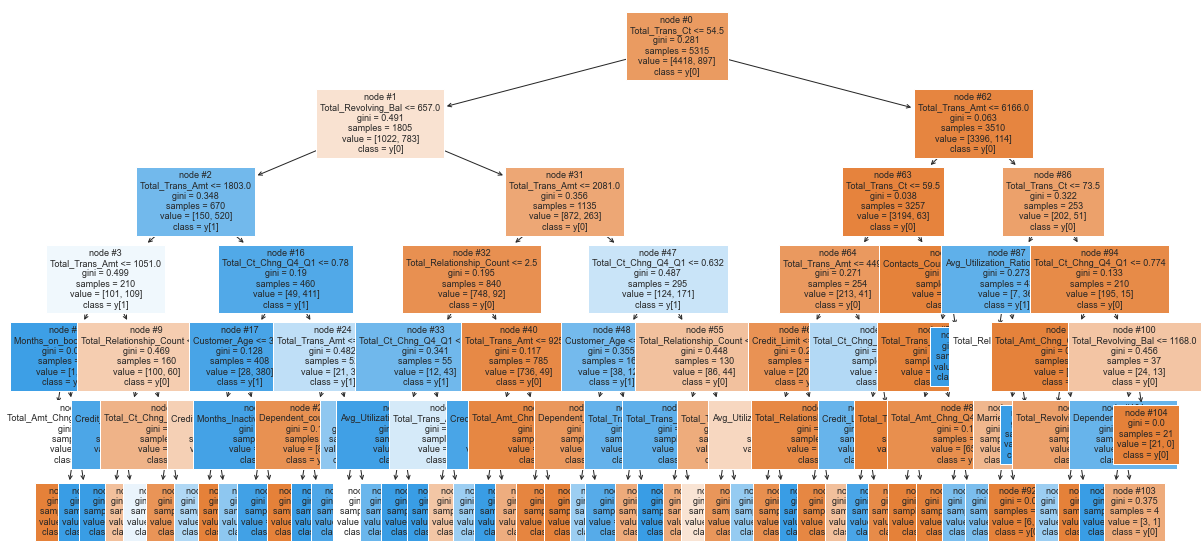

In [62]:
#let's try to limit the depth of the decision tree

model2b = DecisionTreeClassifier(criterion = 'gini', random_state=1, max_depth=6)
model2b.fit(X_train, y_train)

featurenames = list(X_train.columns)
plt.figure(figsize=(20,10))
tree.plot_tree(model2b,feature_names=featurenames,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

As per expected, the performance metrics of the decision tree improved. However, in a way the addition of max_depth classifies as tuning for the decision tree model. Hence, we will include only the basic decision tree model (without max_depth limitation) for comparison with the other untuned bagging & boosing models to check the best three models.

In [63]:
model2bscore = get_metrics_score(model2b)

Accuracy on training set :  0.9606773283160865
Accuracy on test set :  0.9358916478555305
Recall on training set :  0.8595317725752508
Recall on test set :  0.7891891891891892
Precision on training set :  0.9028103044496487
Precision on test set :  0.8202247191011236
F1 score on training set :  0.8806396344945745
F1 score on test set :  0.8044077134986226


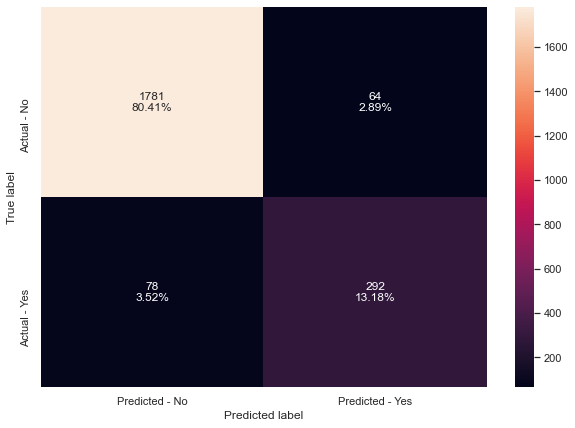

In [64]:
make_confusion_matrix(model2b,y_test)

In [65]:
#BAGGING CLASSIFIER

model3=BaggingClassifier(random_state=1)
model3.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [66]:
bagging_estimator_score=get_metrics_score(model3)

Accuracy on training set :  0.9964252116650988
Accuracy on test set :  0.9530474040632054
Recall on training set :  0.9810479375696767
Recall on test set :  0.8243243243243243
Precision on training set :  0.9977324263038548
Precision on test set :  0.8866279069767442
F1 score on training set :  0.9893198426082068
F1 score on test set :  0.8543417366946778


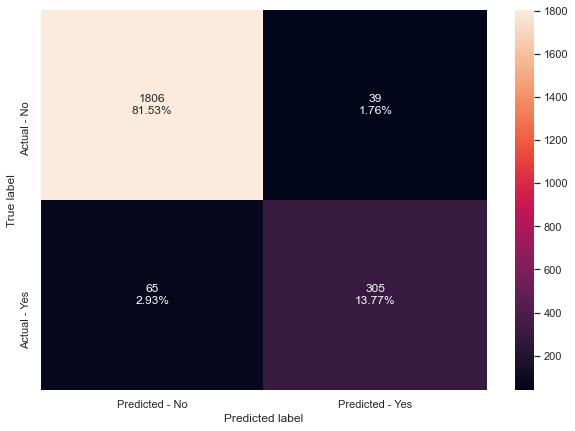

In [67]:
make_confusion_matrix(model3,y_test)

In [68]:
#RANDOM FOREST CLASSIFIER

model4=RandomForestClassifier(random_state=1)
model4.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [69]:
bagging_estimator_score=get_metrics_score(model4)

Accuracy on training set :  1.0
Accuracy on test set :  0.9544018058690745
Recall on training set :  1.0
Recall on test set :  0.8081081081081081
Precision on training set :  1.0
Precision on test set :  0.9088145896656535
F1 score on training set :  1.0
F1 score on test set :  0.8555078683834048


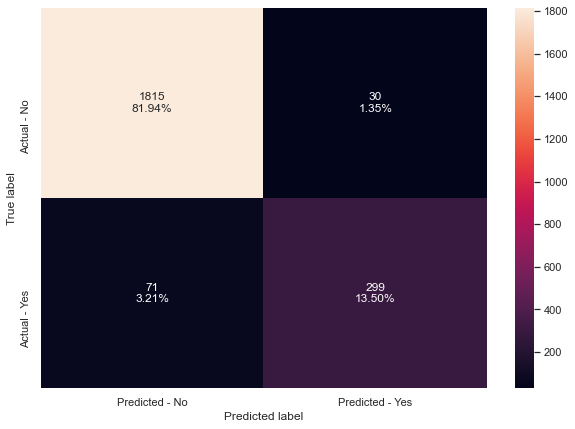

In [70]:
make_confusion_matrix(model4,y_test)

### Boosting

In [71]:
#ADABOOST CLASSIFIER

model5 = AdaBoostClassifier(random_state=1)
model5.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [72]:
abc_score = get_metrics_score(model5)

Accuracy on training set :  0.9599247412982126
Accuracy on test set :  0.9566591422121896
Recall on training set :  0.8528428093645485
Recall on test set :  0.8513513513513513
Precision on training set :  0.9042553191489362
Precision on test set :  0.8848314606741573
F1 score on training set :  0.8777969018932874
F1 score on test set :  0.8677685950413224


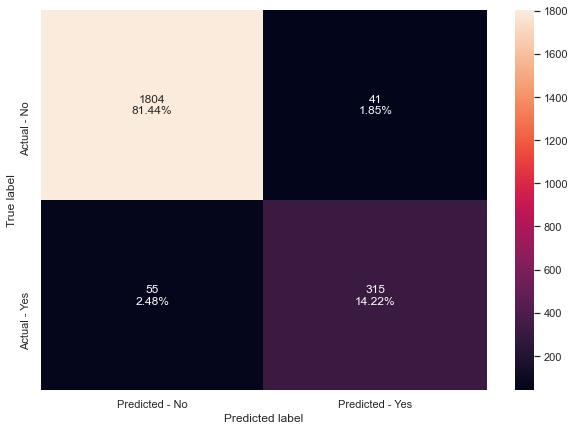

In [73]:
make_confusion_matrix(model5,y_test)

In [74]:
#GRADIENT BOOSTING

model6 = GradientBoostingClassifier(random_state=1)
model6.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [75]:
gbc_score=get_metrics_score(model6)

Accuracy on training set :  0.9787394167450612
Accuracy on test set :  0.9647855530474041
Recall on training set :  0.907469342251951
Recall on test set :  0.8567567567567568
Precision on training set :  0.9644549763033176
Precision on test set :  0.9269005847953217
F1 score on training set :  0.9350947731188972
F1 score on test set :  0.8904494382022472


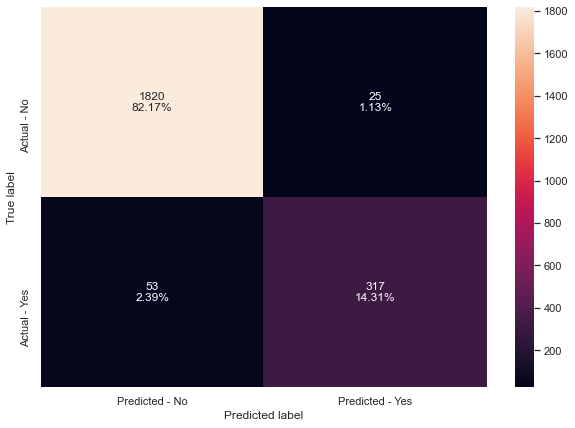

In [76]:
make_confusion_matrix(model6,y_test)

In [77]:
#XGBOOST

model7 = XGBClassifier(random_state=1)
model7.fit(X_train,y_train)

[14:09:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
xgb_score=get_metrics_score(model7)

Accuracy on training set :  1.0
Accuracy on test set :  0.9683972911963883
Recall on training set :  1.0
Recall on test set :  0.8918918918918919
Precision on training set :  1.0
Precision on test set :  0.9166666666666666
F1 score on training set :  1.0
F1 score on test set :  0.9041095890410958


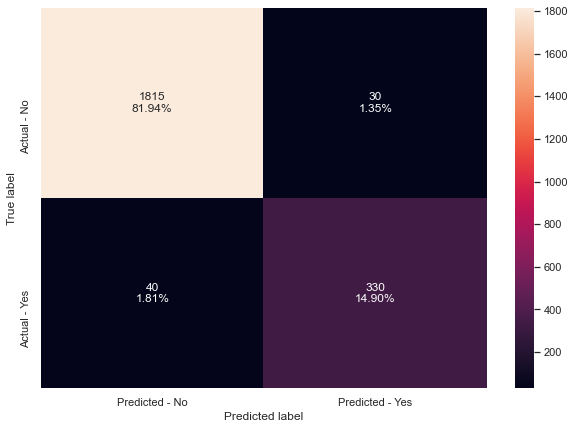

In [114]:
make_confusion_matrix(model7,y_test)

## Finding Top 3 Best Models for Recall

Pipeline and cross validation are used.

In [111]:
#library import

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

In [112]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(criterion = 'gini', random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "BC",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("bagging_classifier", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1)),
            ]
        ),
    )
)


results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 61.76101800124146
DTREE: 78.8193668528864
BC: 79.82433271260086
RF: 79.04220980757293
ADB: 83.61204220980758
GBM: 84.95034140285537
[17:04:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:04:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:04:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Expl

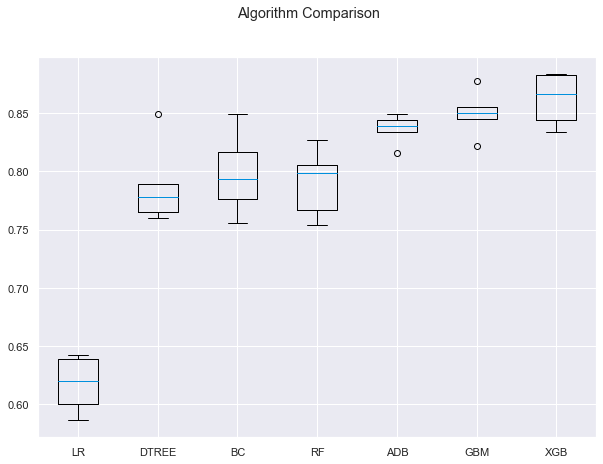

In [113]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

From the comparison of the metrics, the top three most performing models are XGBoost, Gradient Boosting, and AdaBoost. Hence, we will focus the tuning using GridSearchCV and RandomizedSearchCV on the three models to maximize recall values. 

## Model Tuning - GridSearchCV

Note : Tuning is done by running the code repeatedly with changes in the parameters. The code scripts that appeared are a reflection of the closest parameters to the ideal scenario for the best model, after several tests being run at the Jupyter Notebook cell.

### AdaBoost

In [85]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [119]:
%%time

# Creating pipeline
pipeAB = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid2 = {
    "adaboostclassifier__n_estimators": np.arange(160, 200, 10),
    "adaboostclassifier__learning_rate": [0.3,0.4,0.5],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv2 = GridSearchCV(estimator=pipeAB, param_grid=param_grid2, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv2.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv2.best_params_, grid_cv2.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'adaboostclassifier__learning_rate': 0.4, 'adaboostclassifier__n_estimators': 170} 
Score: 0.8773805090006206
Wall time: 2min 46s


In [120]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=170,
        learning_rate=0.4,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=0.4, n_estimators=170,
                                    random_state=1))])

Accuracy on training set :  0.9958607714016933
Accuracy on test set :  0.9665914221218962
Recall on training set :  0.9888517279821628
Recall on test set :  0.8783783783783784
Precision on training set :  0.9866518353726362
Precision on test set :  0.9180790960451978
F1 score on training set :  0.987750556792873
F1 score on test set :  0.8977900552486188


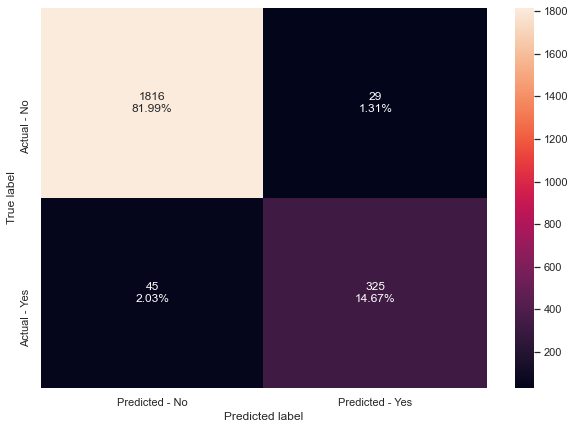

In [121]:
# Calculating different metrics
get_metrics_score(abc_tuned1)

# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

#it can be seen that the recall has been improved compared to the non-tuned adaboost classifier

### Gradient Boosting

In [128]:
%%time

#Creating pipeline
pipeGB = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid1 = {
    "gradientboostingclassifier__n_estimators": np.arange(300, 380, 10),
    "gradientboostingclassifier__subsample": [0.6,0.7,0.8],
    "gradientboostingclassifier__max_features": [0.8,0.9,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv1 = GridSearchCV(estimator=pipeGB, param_grid=param_grid1, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv1.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv1.best_params_, grid_cv1.best_score_)
)

Best Parameters:{'gradientboostingclassifier__max_features': 0.9, 'gradientboostingclassifier__n_estimators': 350, 'gradientboostingclassifier__subsample': 0.7} 
Score: 0.8829795158286778
Wall time: 4min 47s


In [129]:
# Creating new pipeline with best parameters
gbc_tuned1 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        n_estimators=350,
        subsample=0.7,
        max_features=0.9,
        random_state=1,
    ),
)

# Fit the model on training data
gbc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_features=0.9, n_estimators=350,
                                            random_state=1, subsample=0.7))])

Accuracy on training set :  0.9964252116650988
Accuracy on test set :  0.9683972911963883
Recall on training set :  0.987736900780379
Recall on test set :  0.9
Precision on training set :  0.9910514541387024
Precision on test set :  0.9098360655737705
F1 score on training set :  0.9893914014517029
F1 score on test set :  0.904891304347826


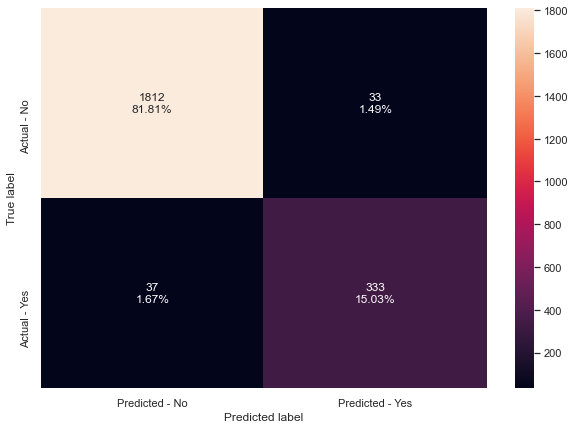

In [130]:
# Calculating different metrics
get_metrics_score(gbc_tuned1)

# Creating confusion matrix
make_confusion_matrix(gbc_tuned1, y_test)

### XGBoost

Due to time constraint, the parameters from optimization with RandomizedSearch are used. The GridSearchCV application to the model is for further tuning of the XGBoost model.

In [151]:
%%time 

#Creating pipeline
pipex=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_gridxgb={'xgbclassifier__n_estimators':[27,28,29],
            'xgbclassifier__scale_pos_weight':[8],
            'xgbclassifier__learning_rate':[0.1,0.11,0.12],
            'xgbclassifier__gamma':[0.1,0.2,0.3],
            'xgbclassifier__subsample':[0.9],
           'xgbclassifier__max_depth':[4],
            'xgbclassifier__reg_lambda':[6]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cvx = GridSearchCV(estimator=pipex, param_grid=param_gridxgb, scoring=scorer, cv=5, n_jobs = -1)

#Fitting parameters in GridSearchCV
grid_cvx.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(grid_cvx.best_params_,grid_cvx.best_score_))

Best parameters are {'xgbclassifier__gamma': 0.2, 'xgbclassifier__learning_rate': 0.11, 'xgbclassifier__max_depth': 4, 'xgbclassifier__n_estimators': 28, 'xgbclassifier__reg_lambda': 6, 'xgbclassifier__scale_pos_weight': 8, 'xgbclassifier__subsample': 0.9} with CV score=0.9565114835505897:
Wall time: 15.6 s


In [152]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        n_estimators=28,
        scale_pos_weight=8,
        learning_rate=0.11,
        gamma=0.2,
        subsample=0.9,
        max_depth=4,
        reg_lambda=6,
        random_state=1,
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

[22:27:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0.2, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.11,
                               max_delta_step=0, max_depth=4,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=28,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=6, scale_pos_weight=8,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9241768579492003
Accuracy on test set :  0.9110609480812641
Recall on training set :  0.9855072463768116
Recall on test set :  0.9540540540540541
Precision on training set :  0.6938775510204082
Precision on test set :  0.6622889305816135
F1 score on training set :  0.81437125748503
F1 score on test set :  0.7818383167220377


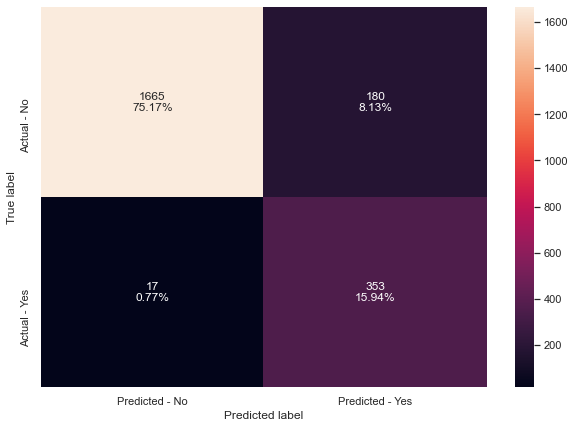

In [153]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

### Bagging Classifier (Addition of Fourth Best Model due to XGBoost GridSearchCV Model being an update from RandomizedSearchCV)

In [156]:
%%time 

#Creating pipeline
pipe4=make_pipeline(StandardScaler(),BaggingClassifier(random_state=1))

#Parameter grid to pass in GridSearchCV
param_grid4={'baggingclassifier__max_samples': np.arange(0.4,0.8,0.1), 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : np.arange(180,500,60)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv4 = GridSearchCV(estimator=pipe4, param_grid=param_grid4, scoring=scorer, cv=5, n_jobs = -1)

#Fitting parameters in GridSearchCV
grid_cv4.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(grid_cv4.best_params_,grid_cv4.best_score_))

Best parameters are {'baggingclassifier__max_features': 0.9, 'baggingclassifier__max_samples': 0.7, 'baggingclassifier__n_estimators': 420} with CV score=0.8450651769087523:
Wall time: 14min 27s


In [157]:
# Creating new pipeline with best parameters
bc_tuned = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        n_estimators=420,
        max_samples=0.7,
        max_features=0.9,
        random_state=1,
    ),
)

# Fit the model on training data
bc_tuned.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(max_features=0.9, max_samples=0.7,
                                   n_estimators=420, random_state=1))])

Accuracy on training set :  0.9998118532455316
Accuracy on test set :  0.963431151241535
Recall on training set :  0.9988851727982163
Recall on test set :  0.8621621621621621
Precision on training set :  1.0
Precision on test set :  0.9140401146131805
F1 score on training set :  0.9994422755158953
F1 score on test set :  0.8873435326842836


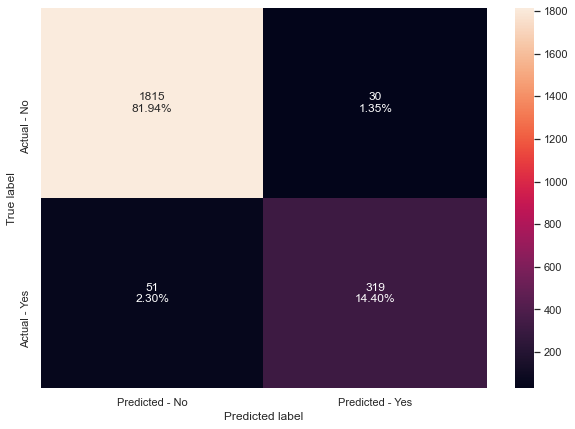

In [158]:
# Calculating different metrics
get_metrics_score(bc_tuned)

# Creating confusion matrix
make_confusion_matrix(bc_tuned, y_test)

## Model Tuning - RandomizedSearchCV

### AdaBoost

In [132]:
from sklearn.model_selection import RandomizedSearchCV

In [133]:
%%time

# Creating pipeline
pipeAB2 = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid2b = {
    "adaboostclassifier__n_estimators": np.arange(10, 300, 10),
    "adaboostclassifier__learning_rate": np.arange(0.1,0.5,0.05),
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
abc_tuned2 = RandomizedSearchCV(estimator=pipeAB2, param_distributions=param_grid2b, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
abc_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(abc_tuned2.best_params_,abc_tuned2.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 120, 'adaboostclassifier__learning_rate': 0.40000000000000013, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8740409683426444:
Wall time: 6min 45s


In [135]:
# Creating new pipeline with best parameters
abc_tuned2 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=120,
        learning_rate=0.40000000000000013,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=0.40000000000000013,
                                    n_estimators=120, random_state=1))])

Accuracy on training set :  0.9907808090310443
Accuracy on test set :  0.9697516930022574
Recall on training set :  0.967670011148272
Recall on test set :  0.8918918918918919
Precision on training set :  0.9774774774774775
Precision on test set :  0.9243697478991597
F1 score on training set :  0.9725490196078431
F1 score on test set :  0.9078404401650619


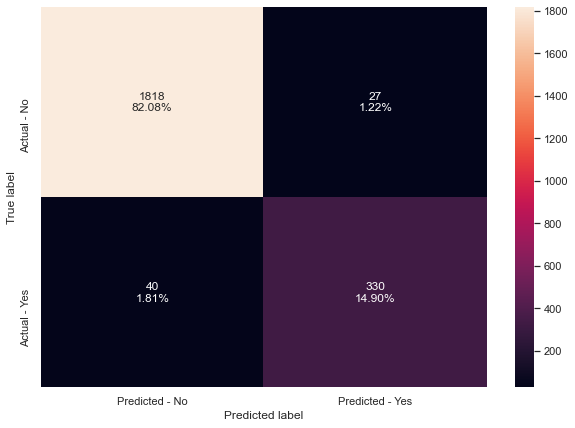

In [136]:
# Calculating different metrics
get_metrics_score(abc_tuned2)

# Creating confusion matrix
make_confusion_matrix(abc_tuned2, y_test)

### Gradient Boosting

In [139]:
%%time

#Creating pipeline
pipeGB2 = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid1b = {
    "gradientboostingclassifier__n_estimators": np.arange(200, 500, 10),
    "gradientboostingclassifier__subsample": np.arange(0.2,0.6,0.05),
    "gradientboostingclassifier__max_features": np.arange(0.5,0.9,0.05),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
gbc_tuned2 = RandomizedSearchCV(estimator=pipeGB2, param_distributions=param_grid1b, n_iter=50, scoring=scorer, cv=5, n_jobs = -1, random_state=1)
 
# Fitting parameters in RandomizedSearchCV
gbc_tuned2.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(gbc_tuned2.best_params_, gbc_tuned2.best_score_)
)

Best parameters are {'gradientboostingclassifier__subsample': 0.39999999999999997, 'gradientboostingclassifier__n_estimators': 320, 'gradientboostingclassifier__max_features': 0.6500000000000001} with CV score=0.8807697082557417:
Wall time: 2min 40s


In [140]:
# Creating new pipeline with best parameters
gbc_tuned22 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        max_features=0.6500000000000001,
        n_estimators=320,
        subsample=0.39999999999999997,
        random_state=1,
    ),
)

# Fit the model on training data
gbc_tuned22.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_features=0.6500000000000001,
                                            n_estimators=320, random_state=1,
                                            subsample=0.39999999999999997))])

Accuracy on training set :  0.992662276575729
Accuracy on test set :  0.9715575620767495
Recall on training set :  0.9687848383500557
Recall on test set :  0.9081081081081082
Precision on training set :  0.9875
Precision on test set :  0.9205479452054794
F1 score on training set :  0.9780528981429375
F1 score on test set :  0.9142857142857143


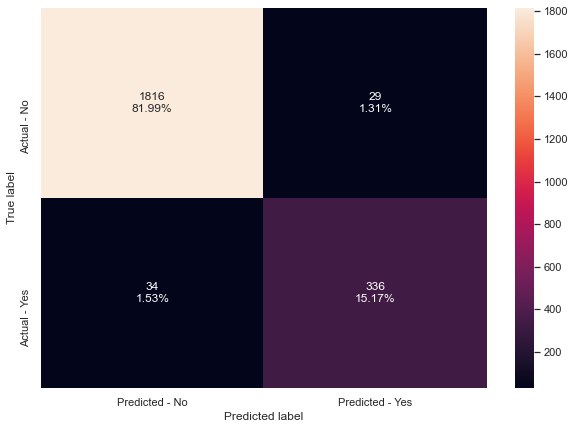

In [141]:
# Calculating different metrics
get_metrics_score(gbc_tuned22)

# Creating confusion matrix
make_confusion_matrix(gbc_tuned22, y_test)

### XGBoost

In [143]:
%%time 

#Creating pipeline
pipexgb=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss', n_estimators = 50))

#Parameter grid to pass in RandomizedSearchCV
param_gridx={'xgbclassifier__n_estimators':np.arange(10,300,10),
            'xgbclassifier__scale_pos_weight':np.arange(0,11,1),
            'xgbclassifier__learning_rate':[0.01,0.05,0.1,0.2],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
           'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':np.arange(0,11,1)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cvx = RandomizedSearchCV(estimator=pipexgb, param_distributions=param_gridx, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cvx.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cvx.best_params_,randomized_cvx.best_score_))

Best parameters are {'xgbclassifier__subsample': 0.9, 'xgbclassifier__scale_pos_weight': 8, 'xgbclassifier__reg_lambda': 6, 'xgbclassifier__n_estimators': 30, 'xgbclassifier__max_depth': 4, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__gamma': 0} with CV score=0.9509248913718187:
Wall time: 3min 35s


In [144]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("XGB", XGBClassifier(
                random_state=1,
                n_estimators=200,
                scale_pos_weight=10,
                gamma=1,
                subsample=0.9,
                learning_rate= 0.01,
                eval_metric='logloss', max_depth = 2, reg_lambda = 2
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=1, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=2, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.7599247412982126
Accuracy on test set :  0.7539503386004515
Recall on training set :  0.9810479375696767
Recall on test set :  0.9675675675675676
Precision on training set :  0.4114071996259935
Precision on test set :  0.40179573512906847
F1 score on training set :  0.5797101449275363
F1 score on test set :  0.5678033306899286


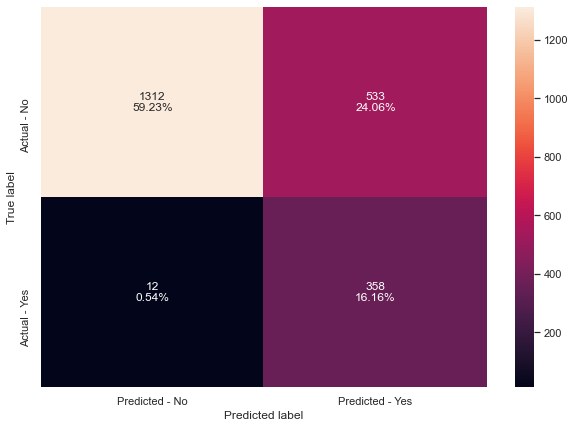

In [145]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

## Model Comparison, Best Model Selection and Feature Importances

In [164]:
# defining list of models
models2 = [abc_tuned1,gbc_tuned1,xgb_tuned1,bc_tuned,abc_tuned2,gbc_tuned22,xgb_tuned2]

# defining empty lists to add train and test results
acc_train2 = []
acc_test2 = []
recall_train2 = []
recall_test2 = []
precision_train2 = []
precision_test2 = []
f1_train2 = []
f1_test2 = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models2:
    j = get_metrics_score(model,False)
    acc_train2.append(np.round(j[0],2))
    acc_test2.append(np.round(j[1],2))
    recall_train2.append(np.round(j[2],2))
    recall_test2.append(np.round(j[3],2))
    precision_train2.append(np.round(j[4],2))
    precision_test2.append(np.round(j[5],2))
    f1_train2.append(np.round(j[6],2))
    f1_test2.append(np.round(j[7],2))
    

comparison_frame2 = pd.DataFrame({'Model':[
    'Adaboost with GridSearchCV','Gradient Boosting with GridSearchCV','XGBoost with GridSearchCV','Bagging Classifier with GridSearchCV',
    'Adaboost with RandomizedSearchCV','Gradient Boosting with RandomizedSearchCV','XGBoost with RandomizedSearchCV'], 
                                 
    'Train_Accuracy': acc_train2,
    'Test_Accuracy': acc_test2,
    'Train_Recall': recall_train2,
    'Test_Recall': recall_test2,
    'Train_Precision': precision_train2,
    'Test_Precision': precision_test2,
    'Train_F1': f1_train2,
    'Test_F1': f1_test2,
                                
                                })

comparison_frame2.sort_values(by="Test_Recall", ascending=False)


Model  Train_Accuracy  Test_Accuracy  \
6            XGBoost with RandomizedSearchCV            0.76           0.75   
2                  XGBoost with GridSearchCV            0.92           0.91   
5  Gradient Boosting with RandomizedSearchCV            0.99           0.97   
1        Gradient Boosting with GridSearchCV            1.00           0.97   
4           Adaboost with RandomizedSearchCV            0.99           0.97   
0                 Adaboost with GridSearchCV            1.00           0.97   
3       Bagging Classifier with GridSearchCV            1.00           0.96   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_F1  \
6          0.98         0.97             0.41            0.40      0.58   
2          0.99         0.95             0.69            0.66      0.81   
5          0.97         0.91             0.99            0.92      0.98   
1          0.99         0.90             0.99            0.91      0.99   
4          0.97         0.89             0.98            0.92      0.97   
0          0.99         0.88             0.99            0.92      0.99   
3          1.00         0.86             1.00            0.91      1.00   

   Test_F1  
6     0.57  
2     0.78  
5     0.91  
1     0.90  
4     0.91  
0     0.90  
3     0.89

We can see that **XGBoost with RandomizedSearchCV** is the best model, followed by XGBoost with GridSearchCV. This is because the models provide the highest values of recall on the test set. As per discussed earlier, recall is the metric of interest as false negatives would be very costly to the bank. Let's see on the feature importances of the best model as per below.

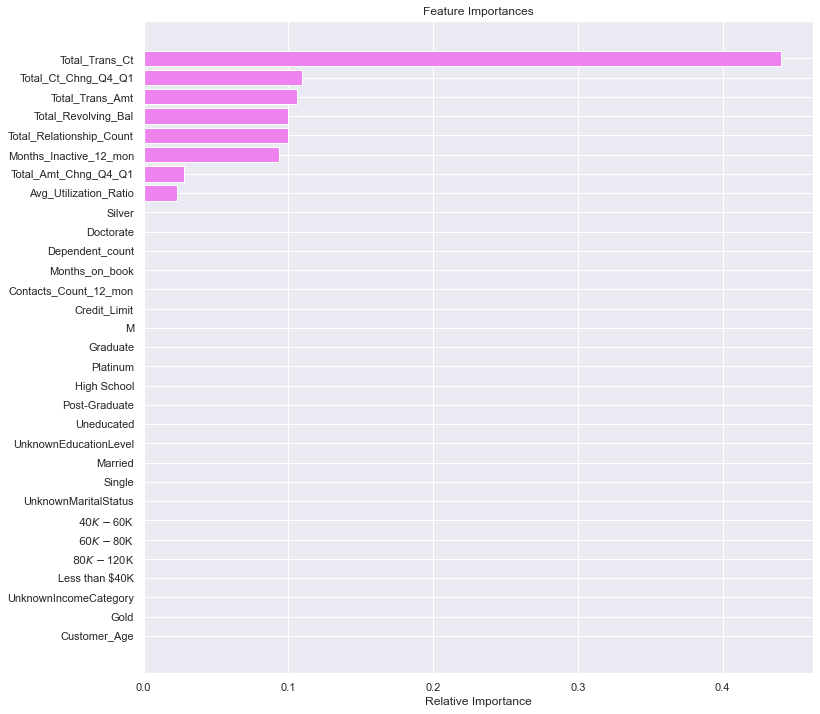

In [161]:
#checking feature importances for XGBoost 

feature_names = X_train.columns
importances = xgb_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

It can be seen that the most important feature is **Total_Trans_Ct**. The second and third most important features are **Total_Ct_Chng_Q4_Q1** and **Total_Trans_Amt** respectively. Other visible factors that contribute to the model are Total_Revolving_Bal, Total_Relationship_Count, Months_Inactive_12_mon, Total_Amt_Chng_Q4_Q1, and Avg_Utilization_Ratio. As per seen from bivariate analysis, it is proven using the model that the factors contribute greatly to the target variable.

Let's see the comparison of time taken between the models tested using both GridSearchCV and RandomizedSearchCV below:

In [166]:
timecomparison_frame = pd.DataFrame({'Model':[
    'Adaboost with GridSearchCV','Gradient Boosting with GridSearchCV','XGBoost with GridSearchCV','Bagging Classifier with GridSearchCV',
    'Adaboost with RandomizedSearchCV','Gradient Boosting with RandomizedSearchCV','XGBoost with RandomizedSearchCV'], 
                                 
    'Time Taken (final run batch) in seconds': [2*60+46,4*60+47,15.6,14*60+27,6*60+45,2*60+40,3*60+35],
    'Parameter Combinations': [36,63,27,96,696,1920,2021184],
    'Time Taken per Combination in seconds': [166/36,287/63,15.6/27,867/96,405/696,160/1920,215/2021184]
                                })
timecomparison_frame

Model  \
0                 Adaboost with GridSearchCV   
1        Gradient Boosting with GridSearchCV   
2                  XGBoost with GridSearchCV   
3       Bagging Classifier with GridSearchCV   
4           Adaboost with RandomizedSearchCV   
5  Gradient Boosting with RandomizedSearchCV   
6            XGBoost with RandomizedSearchCV   

   Time Taken (final run batch) in seconds  Parameter Combinations  \
0                                    166.0                      36   
1                                    287.0                      63   
2                                     15.6                      27   
3                                    867.0                      96   
4                                    405.0                     696   
5                                    160.0                    1920   
6                                    215.0                 2021184   

   Time Taken per Combination in seconds  
0                               4.611111  
1                               4.555556  
2                               0.577778  
3                               9.031250  
4                               0.581897  
5                               0.083333  
6                               0.000106

From the comparison table above, it is clear that GridSearchCV took significantly longer time than RandomizedSearchCV and yet RandomizedSearchCV is able to provide better recall values. 

## Actionable Insights & Recommendations

From the findings above, we can see on the top three most impact factors to attriting customers :
1. Total transaction count over the last 12 months of the customers
2. Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
3. Total transaction amount over the last 12 months of the customers

Additional things to pay attention can also include :
1. Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
2. Total_Relationship_Count: Total no. of products held by the customer
3. Months_Inactive_12_mon: No. of months inactive in the last 12 months
4. Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
5. Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

Hence, the actionable insights & recommendations can include : 
1. To pay attention to/make a detector on the total transaction count & amount over the last 12 months (can be made to 10-11 months for early detection) to find out on the customers that have a chance of renouncing the credit card. A certain threshold can be set, and if the numbers are below that threshold, the bank can approach the customer, whether to provide special promotions or to market other products.
2. To pay attention to/make a detector on the ratio of total transaction count & amount in 4th quarter and the total transaction count in 1st quarter to find out on the customers that have a chance of renouncing the credit card. A certain threshold can be set, and if the numbers are below that threshold, the bank can approach the customer, whether to provide special promotions or to market other products (a new year's promotion might help).
3. As Total_Revolving_Bal is a factor, the bank can introduce a step-up bonus, which will be given to customers when the balance on a month is a certain number above the balance on the month before. This will make the customer more loyal and more willing to put in money in the bank.
4. The bank can also introduce more products to customers who have a low amount of products held. Successful marketing will make customers more attached to the bank and more willing to use the products & services the bank used (and that includes credit cards).
5. To pay attention to/make a detector on whether the customer was inactive in the last 12 months (can be made to 10-11 months for early detection) to find out on the customers that have a chance of renouncing the credit card. A certain threshold can be set, and if the numbers are above that threshold, the bank can approach the customer, whether to provide special promotions or to market other products.